# Predicting Who Is Likely To Purchase Insurance  
### Author: Tossou, Dagbegnon Armand  
Date: 14 December 2020  

### Instructions  
Some notes before starting:  
\* Read all the way through the instructions.  
\* Models must be built using Python, R, or SAS.  
\* New features can be created.  
\* Users cannot add or supplement with external data.  
\* While simple techniques may develop adequate models, success in this exercise typically involves feature engineering and model tuning.  
\* Throughout your code, please use comments to document your thought process as you move through exploratory data analysis, feature engineering, model tuning, etc.  
\* Please review your submission against the submission expectations.  

*Step 1 - Clean and prepare your data:* 
There are several entries where values have been deleted to simulate dirty data. Please clean the data with whatever method(s) you believe is best/most suitable. Note that some of the missing values are truly blank (unknown answers).  Success in this exercise typically involves feature engineering and avoiding data leakage.

*Step 2 - Build your models:* 
Please use two different machine learning/statistical algorithms to develop a total of two models. Please include comments that document choices you make (such as those for feature engineering and for model tuning). 

*Step 3 - Generate predictions:*
Create predictions on the data in test.csv using each of your trained models.  The predictions should be the class probabilities for belonging to the positive class (labeled '1').  

Be sure to output a prediction for each of the rows in the test dataset (10K rows).  Save the results of each of your models in a separate CSV file.  Title the two files 'results1.csv' and 'results2.csv'.  A result file should each have a single column representing the output from one model (no header label or index column is needed). 

*Step 4 - Compare your modeling approaches:* 
Please prepare a relatively short write-up comparing the pros and cons of the two algorithms you used (PDF preferred). As part of the write-up, please identify which algorithm you think will perform the best. For the best performing model, are there choices you made in the context of the exercise that might be different in a business context? How would explain to a business partner the concept that one model is better than the other?

*Step 5 - Submit your work:* 
Your submission should consist of all the code used for exploratory data analysis, cleaning, prepping, and modeling (text, html, or pdf preferred), the two result files (.csv format - each containing 10,000 decimal probabilities), and your write-up comparing the pros and cons of the two modeling techniques used (text, html, or pdf preferred). Note: The results files should not include the original data, only the probabilities.

Your work will be scored on techniques used (appropriateness and complexity), evaluation of the two techniques compared in the write-up, model performance on the data hold out  - measured by AUC, and your overall code/comments.  The threshold for passing model performance is set high, expecting that model tuning and feature engineering will be used. The best score of the two models submitted will be used.

Please do not submit the original data back to us.

### Data  
Download link: https://drive.google.com/drive/folders/147mjv5Mt8MW-_-mYNLbmh0B4nWmkzgqa  
- File 1: exercise_02_train.csv  
- File 2: exercise_02_test.csv  

### My solution  (Problem definition)  
This is a classification problem for a binary/categorical feature. In machine learning and statistics, classification is a supervised learning approach in which the computer program learns from the input data and then uses this learning to classify new observations. After feature engineering, we can use **supervized machine learning algorithms** to build statistical models and make predictions.  

### Methodology  

I use the following data science project framework to organize data cleaning, data exploration, feature engineering and data analysis:  
- Define problem  
- Summarize and prepare data  
- Evaluate algorithms  
- Select best algorithms  
- Improve model results  
- Finalize models  
- Make predictions  
- Present results


I've organized the project into four main parts as follows:  

- Part 1: Preliminary steps and exploratory data analysis (EDA)  
    - Part 1.1: Cleaning and exploring the training dataset  
    - Part 1.2: Cleaning the testing dataset  
- Part 2: Automated feature selection
- Part 3: Feature engineering and modeling 
    - Part 3.1: Baseline machine learning models
    - Part 3.2: Model improvement with data transformation
    - Part 3.3: Model improvement with parameter tuning
    - Part 3.4: Ensemble Models
    - Part 3.5: Finalize models    
- Part 4: Submitting predictions  


### Notes to reader  
I used **Jupyter notebook in the anaconda environment to create this Python script**. It runs with the following systems details:  
- Python system version: '3.8.5' (default, Sep  3 2020, 21:29:08) [MSC v.1916 64 bit (AMD64)]
- Pandas version '1.13'  
- NumPy version '1.19.2'  
- Seaborn version '0.11.0'  
- Matplotlib version '3.3.2'  
- Sklearn version: '0.23.2'  
- SciPy version: '1.5.2'  

Also, I draw upon materials from various classes, others projects, and several machine learning courses. A great course that's worth mentioning here is the one taught by Jason Brownlee PhD. Here's the reference to his book:  
    
        "Brownlee, J. (2016). Machine Learning Mastery with Python: Understand Your Data, Create Accurate Models 
          and Work Projects End-To-End. Machine Learning Mastery. Website: https://machinelearningmastery.com"  

# Part 1: Preliminary steps and exploratory data analysis (EDA)  

I first take care of the training dataset before moving on to the testing dataset.

## Part 1.1: Cleaning and exploring the training dataset  

In the next steps, I will do the following:  

- load Python libraries for EDA  
- loading training dataset  
- preview and summarize the training data  
- visualize the training data (univariate and multivariate plots)  
- clean the training dataset as needed: I will check that some numerical features are not loaded accidently as string, adjust feature labels, handle missing values, convert string features to numerical features (supervized machine learning algorithms don't work with string features), etc.  

### Loading Python libraries for EDA and checking their versions

In [181]:
# Import libaries that will be used in the notebook
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# I silence unnecessary warnings using the filterwarnings module
import warnings
warnings.filterwarnings('ignore')

In [75]:
# Python version
import sys
print('Python system version: {}'.format(sys.version))

Python system version: 3.8.5 (default, Sep  3 2020, 21:29:08) [MSC v.1916 64 bit (AMD64)]


In [76]:
## Check Pandas version
print('Pandas: {}'.format(pd.__version__))

Pandas: 1.1.3


In [79]:
## Check NumPy version
print('NumPy version: {}'.format(np.__version__))

NumPy version: 1.19.2


In [80]:
## Check Seaborn version
print('Seaborn version: {}'.format(sns.__version__))

Seaborn version: 0.11.0


In [81]:
## Check Matplotlib version
print('Matplotlib version: {}'.format(matplotlib.__version__))

Matplotlib version: 3.3.2


In [82]:
# scikit-learn
import sklearn
print('Sklearn version: {}'.format(sklearn.__version__))

Sklearn version: 0.23.2


In [83]:
# scipy
import scipy
print('SciPy version: {}'.format(scipy.__version__))

SciPy version: 1.5.2


### Loading the training dataset

In [1]:
# To set the working directory:
import os
os.chdir('C:\\Users\\tossou2\\Dropbox\\Data_Science\\Python\\Insurance case study')
os.getcwd() # Prints the current working directory

'C:\\Users\\tossou2\\Dropbox\\Data_Science\\Python\\Insurance case study'

In [182]:
# NOTE: I have downloaded the training dataset to my working directory  
df_train = pd.read_csv('exercise_02_train.csv')

### Previewing and summarizing the training dataset

In [ ]:
# Overview: dimensions of the dataset
## How many observations do we have?

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Columns: 101 entries, x0 to y
dtypes: float64(94), int64(1), object(6)
memory usage: 30.8+ MB


In [6]:
# Checking the numbers of rows + columns are in this dataset
df_train.shape

(40000, 101)

The 'train' dataset contains 40,000 rows and 101 columns (100 features + 1 target). These include 94 continuous/numerical features, 1 discrete/numerical feature and 6 string features. 

In [10]:
# display first and last 20 rows of the dataset
df_train.head(20).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
x0,0.19856,-29.6626,15.4938,-19.8377,11.8967,20.2518,21.7135,19.0752,12.7916,25.8948,31.0083,-26.6861,12.6656,-22.3958,-29.1073,-13.2296,-9.98911,20.034,7.50336,14.6946
x1,74.4253,24.3207,-66.1605,33.2109,-26.7179,11.5014,-12.8469,-39.9664,12.7905,-9.77102,-80.3196,0.597804,-56.4517,24.8144,-0.518108,23.6067,-42.8468,-9.12842,25.8524,-35.7217
x2,67.6277,-48.2052,50.5129,53.4056,-17.7582,-1.4401,18.7199,-8.45556,11.8615,-6.36721,-26.2074,82.5106,-21.2791,-8.6634,-33.9832,33.6856,12.8691,-48.89,80.2116,-28.2159
x3,-3.09511,1.43034,-2.26579,1.07946,1.69202,-2.55757,-3.28036,-0.916628,-1.71023,1.58552,-2.3053,0.628069,1.39783,0.165531,3.20228,0.762557,1.39564,0.81674,-1.28696,3.98077
x4,-6.82233,-6.55221,14.4286,11.3643,21.5535,6.18796,-18.5395,25.2654,3.23909,13.8545,-5.18307,19.8308,-6.41802,2.71812,33.5593,0.158211,-9.28708,22.2248,-15.1445,-0.785938
x5,19.0481,4.26307,2.50932,-1.06458,-5.8521,29.3505,-11.3247,-23.3564,21.471,-7.55536,-22.4965,5.98138,-11.9609,19.7079,-0.41901,2.46896,1.84237,-8.71693,28.079,-5.38445
x6,-0.362378,6.55141,-6.70754,9.30886,-0.857435,-11.0814,-3.25863,-0.171326,8.55925,7.30362,-30.4432,0.70594,4.5768,1.86098,4.58063,-1.62417,-6.52935,-1.23739,-7.84951,-4.84824
x7,-10.6992,4.26548,3.82084,9.26608,-2.18694,-5.34536,-5.02054,-2.73019,-2.96008,0.322355,4.24406,9.20769,15.1681,-1.07014,-23.8717,-3.28691,-2.23059,0.278105,5.44839,-4.29673
x8,-22.6998,1.2451,-11.1008,14.553,18.0753,-7.0774,1.57592,-4.04288,8.82862,4.63825,-4.07013,-6.11666,-4.64075,-21.2095,-10.0917,-4.24607,-38.5874,12.2627,11.1261,3.63293
x9,-1.56126,2.24681,-1.45982,-2.01276,-1.40462,5.43701,0.250844,-2.50198,-4.75696,-2.31439,-0.637674,2.11734,1.28961,-2.41433,0.36309,3.77144,0.782879,0.332986,-3.66689,-1.47883


In [11]:
df_train.tail(20).T

,39980,39981,39982,39983,39984,39985,39986,39987,39988,39989,39990,39991,39992,39993,39994,39995,39996,39997,39998,39999
x0,0.107951,-18.8824,-8.11384,16.4339,-19.0217,13.5221,23.1602,14.1394,-34.0402,45.3468,1.53266,3.91421,0.600805,16.8697,-12.8425,-8.01129,21.7694,18.0966,3.45748,-7.25854
x1,-53.8456,-2.55124,-30.3399,-54.1143,114.423,-22.9666,4.9094,-78.7795,25.0911,-41.5003,-25.6534,39.4208,9.90545,18.2352,-38.0284,63.8618,-88.0264,64.2946,-29.4552,13.0953
x2,91.2071,43.898,18.2887,-1.96994,17.6513,32.9912,36.72,1.86341,20.2319,-2.34638,-56.1127,-34.1781,38.8021,-31.6597,48.4933,18.1358,-27.8689,-6.94256,-22.3914,-18.6926
x3,-0.762251,-1.57369,-1.6543,0.473562,2.30459,1.58999,-2.18666,0.723087,-0.373613,0.680254,-1.23937,-0.911638,0.503009,-1.50576,0.72321,-0.328773,-3.49093,1.56342,0.667397,2.32111
x4,-20.1043,16.8704,-0.760682,-9.09998,1.78385,25.0088,-0.810034,16.9253,23.8188,-6.93808,5.31935,26.9959,20.8569,27.1636,5.51096,-10.8579,-9.44072,2.90309,-32.301,20.8991
x5,2.87243,-1.9084,2.03903,-30.4704,32.5838,4.54455,-22.0552,-18.5997,-2.89498,14.6125,-11.4364,-11.2342,9.43699,3.20243,9.6192,14.9978,-1.46173,-6.43503,9.97982,10.3052
x6,-6.23571,-4.26188,-5.81628,3.76422,6.35037,-9.91291,-4.28531,6.36216,2.1756,5.77227,13.2426,8.07645,12.4791,-6.62652,-3.10802,9.44974,2.78609,1.47229,-6.91716,-12.8448
x7,-7.11371,21.0552,-3.96152,-6.96247,8.70419,5.29398,-17.2434,-8.06785,12.4924,-1.31133,1.71324,-3.98291,13.4624,0.471791,-0.240189,-5.15806,-2.91983,8.57425,10.1393,7.79938
x8,6.06705,-8.12925,3.65763,-0.915959,-10.9823,-15.4465,-35.282,-11.9465,-27.2295,-1.01762,5.0196,-3.17275,9.61557,6.78939,-1.85054,-0.638081,0.737335,-23.9797,-5.41125,19.0472
x9,1.11987,-3.11699,1.37724,-1.73754,5.36557,1.44714,-2.82108,4.16537,-3.80548,-4.53027,4.02661,-4.56999,2.96369,9.29546,-1.11126,-5.63385,6.25686,-4.66735,0.945121,4.11863


In [4]:
# Summary statistics of numerical features

## I want to display all the variables (instead of a few by default), using the 'describe' method
#import pandas as pd # make sure to first import 'pandas' if needed
pd.set_option('display.max_rows', 5000)
pd.set_option('display.max_columns', 200)
pd.set_option('display.width', 1000)
# Also, I want to display numerical values with 3 decimal places (instead of 6 by default)
pd.set_option('precision', 3)

In [18]:
df_train.describe()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x36,x37,x38,x39,x40,x42,x43,x44,x46,x47,x48,x49,x50,x51,x52,x53,x54,x55,x56,x57,x58,x59,x60,x61,x62,x63,x64,x65,x66,x67,x69,x70,x71,x72,x73,x74,x75,x76,x77,x78,x79,x80,x81,x82,x83,x84,x85,x86,x87,x88,x89,x90,x91,x92,x94,x95,x96,x97,x98,x99,y
count,39989.000,39990.000,39992.000,39991.000,39992.000,39994.000,39990.000,39991.000,39994.000,39993.000,39991.000,39993.000,39989.000,39986.000,4.000e+04,39996.000,39993.000,39988.000,39986.000,39992.000,39995.000,39987.000,39994.000,39992.000,39986.000,39989.000,3.999e+04,39992.000,39989.000,39995.000,39996.000,39992.000,39996.000,39990.000,39993.000,39996.000,3.999e+04,39991.000,39994.000,39988.000,39998.000,39998.000,39993.000,39996.000,39990.000,39997.000,39993.000,39989.000,3.999e+04,39994.000,39995.000,39989.000,39989.000,39992.000,39991.000,39990.000,3.999e+04,39993.000,39987.000,39986.000,39995.000,39988.000,39991.000,39991.000,39987.000,39995.000,39995.000,39992.000,39988.000,39993.000,39990.000,3.999e+04,39991.000,39993.000,39994.000,39991.000,39996.000,39992.000,39995.000,39997.000,39986.000,3.999e+04,39996.000,39996.000,3.999e+04,39993.000,39996.000,39993.000,39992.000,39992.000,39985.000,39987.000,39994.000,39987.000,40000.000
mean,3.446,-7.789,1.706,-0.073,0.123,-0.609,0.036,-0.053,-2.910,-0.024,7.549,0.019,-4.462,-0.005,3.959e-03,0.012,-0.036,-0.030,6.692,0.090,3.127,6.595,-1.979,-0.047,0.017,0.018,-2.005e-05,9.520,-0.020,0.001,-0.022,0.043,0.008,-0.687,0.003,4.815,4.650e-04,0.056,1.849,-0.536,-0.046,-21.625,0.028,-0.003,0.033,0.043,3.814,-6.535,-1.244e-03,0.091,-0.049,0.045,-1.490,0.078,-0.893,-0.016,-5.887e-04,0.022,-0.032,-2.673,-0.002,-0.013,-2.296,-0.009,-7.436,6.885,0.218,-1.579,-5.047,0.188,5.418,1.308e-02,-0.211,-0.696,1.154,-0.021,-0.020,0.017,0.208,-0.004,-3.639,-4.540e-04,-0.002,-0.003,2.416e-02,-9.003,-0.002,-0.006,-0.014,-0.095,-0.808,-2.514,0.038,0.043,0.204
std,16.248,37.015,38.385,1.503,16.290,15.585,9.041,6.953,13.149,2.940,40.665,4.448,17.952,2.540,3.103e+00,8.675,4.061,6.575,27.596,20.929,16.367,35.681,37.869,7.536,3.750,3.975,5.563e-01,40.219,2.880,0.849,3.263,5.785,1.619,3.511,1.664,31.563,7.540e+00,9.805,34.780,21.822,15.064,87.307,8.316,4.500,3.685,12.797,20.147,37.169,9.895e-01,24.572,5.080,3.540,29.949,35.390,6.320,6.062,5.556e+00,14.911,7.420,13.872,7.831,1.249,38.483,3.779,67.442,37.414,35.702,7.861,27.267,27.206,35.658,5.598e+00,34.667,4.003,22.104,19.212,9.781,5.316,4.965,5.222,18.384,5.887e-01,8.335,3.819,4.108e+00,96.667,2.627,4.605,2.166,27.517,23.836,18.555,8.451,1.114,0.403
min,-60.114,-157.341,-163.340,-6.277,-61.632,-62.809,-35.061,-26.737,-53.736,-11.497,-170.569,-17.847,-78.366,-10.826,-1.275e+01,-35.469,-17.735,-25.738,-103.959,-84.212,-72.673,-145.361,-162.276,-34.425,-14.715,-15.659,-2.322e+00,-143.037,-11.601,-3.581,-14.375,-23.831,-6.760,-16.231,-6.759,-127.652,-3.045e+01,-37.738,-141.838,-109.445,-61.803,-423.120,-34.362,-18.656,-14.619,-54.269,-78.221,-167.272,-3.903e+00,-90.811,-20.397,-15.928,-128.052,-161.356,-31.396,-24.312,-2.480e+01,-62.784,-30.248,-65.170,-30.071,-5.444,-177.824,-15.698,-297.612,-135.730,-139.778,-34.779,-121.800,-108.744,-146.967,-2.162e+01,-159.803,-16.977,-90.338,-77.051,-37.997,-20.249,-22.231,-22.498,-79.753,-2.156e+00,-35.368,-16.203,-1.587e+01,-422.712,-10.179,-20.044,-9.396,-125.065,-108.475,-73.909,-35.416,-4.377,0.000
25%,-7.602,-32.741,-24.142,-1.088,-10.896,-11.183,-6.090,-4.748,-11.723,-2.004,-19.681,-2.959,-16.506,-1.718,-2.091e+00,-5.836,-2.764,-4.462,-11.798,-14.162,-7.853,-17.343,-27.372,-5.102,-2.518,-2.690,-3.757e-01,-17.660,-1.985,-0.575,-2.233,-3.852,-1.076,-3.039,-1.120,-16.592,-5.088e+00,-6.562,-22.005,-15.245,-10.178,-76.474,-5.662,-3.067,-2.450,-8.550,-9.640,-31.644,-6.744e-01,-16.456,-3.478,-2.346,-21.416,-24.006,-5.176,-4.099,-3.737e+00,-10.012,-5.004,-12.021,-5.338,-0.855,-28.470,-2.570,-51.844,-17.960,-23.640,-6.841,-23.241,-18.158,-17.978,-3.748e+00,-

- Judging from the '**count**', most features have a few missing values. The target has none.  
- The mean value of the target is relatively small, at 0.2036 out of 1. Further, the 1st, 2nd and 3rd quartiles of the feature are all zero. These characteristics of the distribution could be good or bad, depending on what the target represents. For instance if the target represents the status of a loan in a loan default analysis context whereby label '1' is 'good loan' and label '0' is 'bad loan', then a mean of 0.2036 signals a poorly performing portfolio. Instead, assuming the target measures weather or not a customer who purchased an auto insurance policy had an accident, whereby label '1' is 'had accident' and label '0' is 'no accident', then a mean of 0.2036 would mean that roughly 1 in 5 customers incurr an accident. This could signal a well performing portfolio.  
- Standard deviations are rather large for many features, compared to their mean values. This suggests the data might need to be preprocessed somehow (rescaled, standardized, etc.)  

In [91]:
# Checking the class distribution of the target: 'y'
df_train.groupby('y').size() # alternatively, I can use the '.unique()' methos like this: df_train['y'].unique()

y
0    31856
1     8144
dtype: int64

The target is categorical/numerical with values 0 and 1 (i.e., binary). There are nearly 4 times the number of observations with class '0' than there are with class '1'. The problem does not specify what 0 and 1 represent, but the instructions are to produce predictions of prabilities for belonging to the positive class (label '1'). 

In [27]:
# Check linear correlations between attributes

## Set pandas to display float values to two decimal places
#pd.options.display.float_format = "{:,.4f}".format

df_train.corr(method='pearson')

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x36,x37,x38,x39,x40,x42,x43,x44,x46,x47,x48,x49,x50,x51,x52,x53,x54,x55,x56,x57,x58,x59,x60,x61,x62,x63,x64,x65,x66,x67,x69,x70,x71,x72,x73,x74,x75,x76,x77,x78,x79,x80,x81,x82,x83,x84,x85,x86,x87,x88,x89,x90,x91,x92,x94,x95,x96,x97,x98,x99,y
x0,1.000e+00,-2.190e-01,-1.566e-01,-1.482e-01,-2.610e-01,-7.800e-02,1.033e-03,-3.080e-03,1.108e-01,-4.780e-03,2.465e-01,-9.699e-03,2.894e-03,4.540e-03,2.860e-03,3.035e-03,-6.703e-03,-1.614e-03,-5.121e-03,-1.161e-01,-2.194e-01,3.513e-01,-1.073e-01,1.566e-04,4.400e-03,7.677e-02,-7.007e-03,1.793e-01,2.786e-03,1.933e-04,3.077e-03,7.564e-04,4.031e-03,-1.430e-01,-5.731e-03,-1.940e-01,5.596e-03,5.376e-03,-3.122e-02,-3.553e-01,8.280e-02,-1.092e-01,2.191e-03,6.133e-02,2.842e-03,2.647e-01,-2.596e-02,2.276e-01,-1.337e-02,2.110e-01,-1.005e-02,4.719e-04,-1.852e-01,-1.185e-01,-5.814e-02,3.569e-03,8.744e-03,3.579e-02,2.475e-03,1.383e-01,-3.820e-03,-1.339e-03,1.597e-01,-1.055e-03,-1.550e-01,-3.182e-02,1.831e-01,-1.150e-01,-8.144e-02,7.750e-02,-3.039e-02,7.651e-04,2.004e-01,1.753e-01,3.453e-02,-2.463e-02,-6.273e-03,-3.274e-03,1.452e-01,-2.550e-03,-1.319e-01,-1.200e-03,4.467e-03,-1.492e-03,1.049e-03,-3.035e-01,1.794e-03,-6.218e-03,4.289e-03,-1.248e-01,-1.374e-01,-7.147e-02,1.938e-03,-2.474e-01,-6.519e-02
x1,-2.190e-01,1.000e+00,-2.507e-02,-3.291e-02,-1.909e-02,8.269e-02,-4.238e-03,4.183e-03,-1.119e-01,5.915e-03,1.329e-02,9.030e-03,9.202e-02,6.139e-03,-7.908e-03,-1.561e-03,9.364e-04,2.526e-03,-3.985e-02,8.335e-03,6.271e-02,1.034e-01,1.180e-01,-1.059e-02,4.707e-03,1.626e-02,5.208e-03,-8.958e-03,-1.330e-03,-3.528e-03,-1.145e-02,1.658e-02,4.496e-03,-2.206e-02,9.548e-04,-1.179e-01,1.757e-03,1.590e-03,1.367e-01,-2.225e-01,7.298e-02,7.281e-02,-1.683e-03,-1.108e-01,-7.284e-03,-2.606e-02,6.579e-02,-9.235e-02,9.861e-03,-7.407e-03,4.663e-03,6.811e-03,2.799e-02,1.400e-01,9.590e-02,2.252e-03,-6.081e-03,4.856e-02,-2.492e-03,1.617e-02,4.929e-03,-1.916e-03,2.314e-01,-4.508e-03,2.056e-02,-2.744e-02,4.151e-02,1.440e-01,6.151e-02,7.163e-02,7.625e-02,1.714e-03,-1.664e-02,1.653e-01,-4.690e-02,-2.542e-02,2.321e-04,2.843e-03,5.870e-02,-9.850e-03,8.090e-04,-1.174e-03,-4.676e-03,3.830e-03,-2.021e-03,-7.672e-02,7.758e-03,-8.138e-05,-7.111e-03,3.593e-02,2.411e-01,-5.575e-02,-1.332e-03,2.618e-02,1.040e-01
x2,-1.566e-01,-2.507e-02,1.000e+00,-8.883e-02,-6.717e-02,2.726e-03,5.451e-03,-2.137e-03,-5.094e-05,3.288e-03,-8.752e-04,1.635e-03,5.516e-02,8.493e-03,-3.917e-03,1.954e-03,-9.778e-04,3.213e-04,-2.326e-02,-1.237e-01,2.977e-02,-2.812e-02,3.529e-02,6.399e-03,-4.916e-03,-3.900e-02,-6.154e-03,7.689e-02,-3.782e-03,1.590e-03,4.910e-04,1.113e-02,-1.860e-04,-5.489e-02,-6.264e-04,4.815e-02,2.019e-03,2.948e-03,-5.634e-02,1.368e-01,-8.757e-03,-1.048e-01,9.624e-03,-3.112e-02,7.509e-04,4.454e-02,6.140e-02,7.116e-03,6.605e-03,-8.323e-02,8.337e-03,9.640e-03,-1.287e-02,5.690e-02,1.663e-01,5.534e-03,3.149e-03,-1.188e-01,-4.029e-03,-1.035e-01,-5.764e-03,-8.183e-04,2.023e-02,2.618e-03,3.886e-02,-3.721e-02,1.301e-01,-4.832e-03,-7.275e-02,-5.246e-02,-8.792e-02,-1.694e-03,-3.071e-02,-4.963e-02,6.340e-02,-3.265e-02,-1.035e-02,-3.826e-03,-3.213e-02,2.251e-03,-8.211e-02,-1.627e-03,4.473e-04,2.759e-03,-4.508e-03,-2.134e-01,-1.111e-03,9.423e-03,1.042e-02,-1.748e-02,-5.670e-02,1.581e-01,1.244e-02,2.667e-02,8.851e-02
x3,-1.482e-01,-3.291e-02,-8.883e-02,1.000e+00,1.895e-02,-7.140e-03,-8.659e-03,4.365e-03,-2.354e-02,-5.373e-03,-5.741e-02,1.529e-03,-1.011e-01,-4.148e-03,3.071e-03,5.818e-03,-5.999e-03,5.999e-04,-4.435e-02,8.112e-02,5.128e-02,-4.244e-02,-1.749e-02,1.788e-03,2.552e-03,-1.028e-01,3.473e-03,-4.076e-02,1.124e-03,-3.263e-04,7.859e-03,2.288e-03,-3.034e-03,1.114e-01,3.260e-03,1.087e-01,-2.685e-03,-3.117e-03,-2.274e-02,3.224e-01,5.860e-02,5.072e-02,-1.189e-03,-6.548e-02,8.540e-03,-1.108e-01,1.164e-02,-1.207e-01,8.441e-03,9.928e-02,-2.877e-04,-7.021e-03,-8.575e-02,-4.335e-02,-1.446e-02,1.798e-03,-7.856e-03,-4.278e-02,6.297e-03,-3.254e-0

I use pairwise Pearson correlations which assume a normal distribution of the attributes involved. Correlation values range from -1 to 1. A value of -1 or 1, respectively means a perfectly negative or positive correlation. A value of 0 means no linear relationship exists at all between the two features involved. Given the small values in the correlation matrix, we suspect that most features might be weakly related to each other (linearly speaking). We'll use other tools to check. This is important because multicollinearity can negatively impact machine learning algorithms. 

In [28]:
# Check the skew of univariate distributions
df_train.skew()

x0     5.822e-03
x1     3.011e-02
x2    -1.757e-02
x3    -1.214e-02
x4     1.808e-02
x5    -1.328e-03
x6     5.109e-03
x7    -7.551e-03
x8     7.519e-03
x9     2.466e-02
x10   -2.815e-02
x11    6.911e-03
x12   -6.830e-03
x13   -8.032e-03
x14    1.734e-02
x15   -5.908e-03
x16   -1.849e-02
x17   -2.078e-03
x18   -2.167e-02
x19    3.051e-02
x20    2.208e-02
x21    4.284e-03
x22    5.311e-02
x23   -1.892e-02
x24   -7.938e-03
x25    4.729e-02
x26    1.964e-03
x27    1.560e-02
x28    1.456e-02
x29   -1.856e-02
x30   -1.152e-02
x31   -7.448e-03
x32    2.325e-02
x33   -1.051e-02
x36    7.817e-03
x37    4.365e-02
x38    2.287e-02
x39    6.361e-03
x40    9.628e-02
x42   -9.328e-03
x43   -4.611e-02
x44   -1.917e-01
x46   -1.553e-02
x47    4.858e-02
x48    7.127e-03
x49   -5.730e-02
x50    1.534e-03
x51   -4.865e-02
x52   -6.178e-03
x53    5.145e-03
x54   -1.067e-02
x55   -1.207e-02
x56   -6.036e-02
x57    1.187e-01
x58   -1.105e-02
x59    1.916e-03
x60   -1.281e-02
x61   -5.265e-02
x62   -9.031e-

Many machine learning techniques assume a normal distribution for features (i.e., skew equal 0). The data show that all our numerical features have either positive (right) or negative (left) skew. I need to address this later during the preprocessing stage (with feature standardization, etc).  

### Checking for and handling missing observation in the training dataset

In [93]:
# What types of variables are the features and target in this dataset?
df_train.dtypes

x0     float64
x1     float64
x2     float64
x3     float64
x4     float64
x5     float64
x6     float64
x7     float64
x8     float64
x9     float64
x10    float64
x11    float64
x12    float64
x13    float64
x14    float64
x15    float64
x16    float64
x17    float64
x18    float64
x19    float64
x20    float64
x21    float64
x22    float64
x23    float64
x24    float64
x25    float64
x26    float64
x27    float64
x28    float64
x29    float64
x30    float64
x31    float64
x32    float64
x33    float64
x34     object
x35     object
x36    float64
x37    float64
x38    float64
x39    float64
x40    float64
x41     object
x42    float64
x43    float64
x44    float64
x45     object
x46    float64
x47    float64
x48    float64
x49    float64
x50    float64
x51    float64
x52    float64
x53    float64
x54    float64
x55    float64
x56    float64
x57    float64
x58    float64
x59    float64
x60    float64
x61    float64
x62    float64
x63    float64
x64    float64
x65    float64
x66    flo

- Most features are float (continuous numerical) variables.  
- 6 features look like string variables ('object' data type). Let's make sure this is the case, as sometimes Pandas can misclassify raw data types.  

In [183]:
# print list of string features only
df_train.select_dtypes(include=['object'])

,x34,x35,x41,x45,x68,x93
0,Toyota,wed,$449.48,0.0%,Jun,asia
1,Honda,wed,$-525.06,0.0%,sept.,asia
2,bmw,wed,$-599.5,0.01%,Oct,america
3,volkswagon,wed,$-220.71,-0.0%,Jun,asia
4,volkswagon,thurday,$-1405.59,-0.0%,July,asia
...,...,...,...,...,...,...
39995,Toyota,wednesday,$-2113.2,-0.01%,July,euorpe
39996,Honda,thur,$935.41,-0.02%,sept.,asia
39997,volkswagon,wed,$338.2,-0.01%,July,asia
39998,bmw,thurday,$-169.39,0.02%,Jun,asia


Aha! Features 'x41' and 'x45' are actually numeric/continuous variables; not string. I can fix this by removing the 'undesirable' characters: '$' and '%'.    

In [184]:
# converting 'x41' and 'x45' to float
df_train['x41'] = df_train['x41'].str.replace(r'\D', '').astype(float)
df_train['x45'] = df_train['x45'].str.replace(r'\D', '').astype(float)

In [185]:
# checking that 'x41' and 'x45' are not string features anymore
df_train.select_dtypes(include=['object']) # not in the list. Great!

,x34,x35,x68,x93
0,Toyota,wed,Jun,asia
1,Honda,wed,sept.,asia
2,bmw,wed,Oct,america
3,volkswagon,wed,Jun,asia
4,volkswagon,thurday,July,asia
...,...,...,...,...
39995,Toyota,wednesday,July,euorpe
39996,Honda,thur,sept.,asia
39997,volkswagon,wed,July,asia
39998,bmw,thurday,Jun,asia


In [186]:
# how many missing values do we have per feature?
df_train.isna().sum()

x0     11
x1     10
x2      8
x3      9
x4      8
x5      6
x6     10
x7      9
x8      6
x9      7
x10     9
x11     7
x12    11
x13    14
x14     3
x15     4
x16     7
x17    12
x18    14
x19     8
x20     5
x21    13
x22     6
x23     8
x24    14
x25    11
x26     9
x27     8
x28    11
x29     5
x30     4
x31     8
x32     4
x33    10
x34     7
x35    13
x36     7
x37     4
x38     6
x39     9
x40     6
x41     4
x42    12
x43     2
x44     2
x45     5
x46     7
x47     4
x48    10
x49     3
x50     7
x51    11
x52     8
x53     6
x54     5
x55    11
x56    11
x57     8
x58     9
x59    10
x60    12
x61     7
x62    13
x63    14
x64     5
x65    12
x66     9
x67     9
x68     8
x69    13
x70     5
x71     5
x72     8
x73    12
x74     7
x75    10
x76    10
x77     9
x78     7
x79     6
x80     9
x81     4
x82     8
x83     5
x84     3
x85    14
x86    11
x87     4
x88     4
x89    11
x90     7
x91     4
x92     7
x93     7
x94     8
x95     8
x96    15
x97    13
x98     6
x99    13


All the features (except the target) have missing values. The number of missing values per feature is rather tiny (relative to the sample size), therefore we can impute these values without risking to introduce some biais accidentally into the dataset. Alternatively, we could just drop these observations, but there's no point in losing some data here.  

I will use __mode filling__ and __median filling__ respectively, to impute missing values for string and numeric features. These are popular ways to handle missing data in data science or machine learning.  

In [187]:
# loops over the list of column names
for item in list(df_train.columns.values): 
    # if feature is string
    if df_train[item].dtypes=='object': 
        # extract mode value for this feature
        mode_item = df_train[item].mode()[0] 
        # mode fill this feature
        df_train[item] = df_train[item].fillna(mode_item) 
        # if feature is numeric
    elif df_train[item].dtypes=='float': 
        # extract median value for this feature
        median_item = df_train[item].median() 
        # median fill this feature
        df_train[item] = df_train[item].fillna(median_item) 
# NOTE: the mode always return the modal value and its index, this means we can have more than one returned modal value. We chose the 2nd one by indexing with [0].        

In [188]:
# checking to make sure that all missing values have been properly imputed
df_train.isna().sum() # Great!

x0     0
x1     0
x2     0
x3     0
x4     0
x5     0
x6     0
x7     0
x8     0
x9     0
x10    0
x11    0
x12    0
x13    0
x14    0
x15    0
x16    0
x17    0
x18    0
x19    0
x20    0
x21    0
x22    0
x23    0
x24    0
x25    0
x26    0
x27    0
x28    0
x29    0
x30    0
x31    0
x32    0
x33    0
x34    0
x35    0
x36    0
x37    0
x38    0
x39    0
x40    0
x41    0
x42    0
x43    0
x44    0
x45    0
x46    0
x47    0
x48    0
x49    0
x50    0
x51    0
x52    0
x53    0
x54    0
x55    0
x56    0
x57    0
x58    0
x59    0
x60    0
x61    0
x62    0
x63    0
x64    0
x65    0
x66    0
x67    0
x68    0
x69    0
x70    0
x71    0
x72    0
x73    0
x74    0
x75    0
x76    0
x77    0
x78    0
x79    0
x80    0
x81    0
x82    0
x83    0
x84    0
x85    0
x86    0
x87    0
x88    0
x89    0
x90    0
x91    0
x92    0
x93    0
x94    0
x95    0
x96    0
x97    0
x98    0
x99    0
y      0
dtype: int64

In [11]:
# Check the number of unique classes in the 4 string features
cat_cols = df_train.select_dtypes(include='object').columns

for col in cat_cols:
    print("Number of classes in {}:".format(col))
    print(df_train[col].nunique())
    print('--------------------------')

Number of classes in x34:
10
--------------------------
Number of classes in x35:
8
--------------------------
Number of classes in x68:
12
--------------------------
Number of classes in x93:
3
--------------------------


Not bad at all. Feature 'x68' has the largest class value at 12. Feature 'x93' has only 3 classes. And we're dealing with just 4 features total, so this is really manageable!  

Let's display classes for each of the 4 features.  

In [189]:
for item in ['x34','x35','x68','x93']:
    print("Classes in {}:".format(item))
    print(df_train[item].value_counts())
    print('--------------------------')

Classes in x34:
volkswagon    12462
Toyota        11079
bmw            7282
Honda          5179
tesla          2248
chrystler      1219
nissan          334
ford            159
mercades         27
chevrolet        11
Name: x34, dtype: int64
--------------------------
Classes in x35:
wed          14806
thurday      13375
wednesday     5920
thur          4383
tuesday        894
friday         537
monday          61
fri             24
Name: x35, dtype: int64
--------------------------
Classes in x68:
July       11088
Jun         9261
Aug         8211
May         4769
sept.       3485
Apr         1614
Oct          904
Mar          431
Nov          151
Feb           56
Dev           20
January       10
Name: x68, dtype: int64
--------------------------
Classes in x93:
asia       35423
america     3131
euorpe      1446
Name: x93, dtype: int64
--------------------------


It appears that 'x34' is auto make, 'x35' is week day, 'x68' is month of the year, and 'x93' is continent (on the globe).  

I can use manual encoding on 'x35' and 'x68'. But I prefer to use **One-Hot encoding** on 'x34' and 'x93'. The One-Hot encoder uses binary values to represent feature classes and creates a feature per category:  
- For 'x34': it could matter a lot for decision making whether someone owns a Tesla (expensive car) rather than a Toyota (potentially much cheaper car).  
- For 'x93': the continent that someone lives in matters a lot for decision making. Well, I'm assuming that's what is being measure here :)  

Cleaning feature 'x35':

In [190]:
# relabeling 'x35'
df_train['x35'] = df_train['x35'].replace('wed','wednesday')
df_train['x35'] = df_train['x35'].replace('thurday','thursday')
df_train['x35'] = df_train['x35'].replace('thur','thursday')
df_train['x35'] = df_train['x35'].replace('fri','friday')

In [191]:
# converting 'x35' to numerical
df_train['x35']=df_train['x35'].map({'monday':1,
                                     'tuesday':2,
                                     'wednesday':3,
                                     'thursday':4,
                                     'friday':5})

In [192]:
# checking to make sure 'x35' is all clean
df_train['x35'].value_counts() # Great!

3    20726
4    17758
2      894
5      561
1       61
Name: x35, dtype: int64

In [193]:
# checking summary statistics for 'x35'
df_train['x35'].describe()

count    40000.000
mean         3.447
std          0.574
min          1.000
25%          3.000
50%          3.000
75%          4.000
max          5.000
Name: x35, dtype: float64

In [107]:
# Checking the skew of 'x35'
df_train['x35'].skew() # almost no skew at all!

-0.04415589687894628

Cleaning feature 'x68':

In [194]:
# relabeling 'x68'
df_train['x68'] = df_train['x68'].replace('January','Jan')
df_train['x68'] = df_train['x68'].replace('sept.','Sept')
df_train['x68'] = df_train['x68'].replace('Dev','Dec')

In [195]:
# converting 'x68' to numerica
df_train['x68']=df_train['x68'].map({'Jan':1,
                                     'Feb':2,
                                     'Mar':3,
                                     'Apr':4,
                                     'May':5,
                                     'Jun':6,
                                     'July':7,
                                     'Aug':8,
                                     'Sept':9,
                                     'Oct':10,
                                    'Nov':11,
                                    'Dec':12})

In [19]:
# checking to make sure 'x68' is all clean now
df_train['x68'].value_counts()

7     11088
6      9261
8      8211
5      4769
9      3485
4      1614
10      904
3       431
11      151
2        56
12       20
1        10
Name: x68, dtype: int64

In [20]:
# checking summary statistics for 'x68'
df_train['x68'].describe()

count    40000.000
mean         6.822
std          1.444
min          1.000
25%          6.000
50%          7.000
75%          8.000
max         12.000
Name: x68, dtype: float64

In [116]:
# Checking the skew of 'x68'
df_train['x68'].skew() # a slight left skew!

-0.08590386219552586

Now let's use One-Hot encoding on 'x34' and 'x93'.

Note that we should drop one column per feature among the One-Hot encoded results. This is important to avoid creating *multicollinearity* among the One-Hot encoded columns:

In [196]:
from sklearn.preprocessing import OneHotEncoder

# list of features to encode 
cats = ['x34','x93']

# run One-Hot encoding
df_train_onehot = pd.get_dummies(df_train, columns=cats)
df_train=df_train_onehot.loc[:, df_train_onehot.columns]

In [197]:
# checking that these features are well encoded, by showing descriptive statistics for all the dataset  
df_train.describe() # Perfecto! :)  

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x35,x36,x37,x38,x39,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49,x50,x51,x52,x53,x54,x55,x56,x57,x58,x59,x60,x61,x62,x63,x64,x65,x66,x67,x68,x69,x70,x71,x72,x73,x74,x75,x76,x77,x78,x79,x80,x81,x82,x83,x84,x85,x86,x87,x88,x89,x90,x91,x92,x94,x95,x96,x97,x98,x99,y,x34_Honda,x34_Toyota,x34_bmw,x34_chevrolet,x34_chrystler,x34_ford,x34_mercades,x34_nissan,x34_tesla,x34_volkswagon,x93_america,x93_asia,x93_euorpe
count,40000.000,40000.000,40000.000,40000.000,40000.000,40000.000,40000.000,40000.000,40000.000,40000.000,40000.000,40000.000,40000.000,40000.000,4.000e+04,40000.000,40000.000,40000.000,40000.000,40000.000,40000.000,40000.000,40000.000,40000.000,40000.000,40000.000,4.000e+04,40000.000,40000.000,40000.000,40000.000,40000.000,40000.000,40000.000,40000.000,40000.000,40000.000,4.000e+04,40000.000,40000.000,40000.000,40000.000,40000.000,40000.000,40000.000,40000.000,40000.000,40000.000,40000.000,40000.000,40000.000,4.000e+04,40000.000,40000.000,40000.000,40000.000,40000.000,40000.000,40000.000,4.000e+04,40000.000,40000.000,40000.000,40000.000,40000.000,40000.000,40000.000,40000.000,40000.000,40000.000,40000.000,40000.000,40000.000,40000.000,40000.000,4.000e+04,40000.000,40000.000,40000.000,40000.000,40000.000,40000.000,40000.000,40000.000,40000.000,4.000e+04,40000.000,40000.000,4.000e+04,40000.000,40000.000,40000.000,40000.000,40000.000,40000.000,40000.000,40000.000,40000.000,40000.000,40000.000,40000.000,40000.000,4.000e+04,40000.000,40000.000,4.000e+04,40000.000,40000.000,40000.000,40000.000,40000.000,40000.000
mean,3.446,-7.789,1.706,-0.073,0.123,-0.609,0.036,-0.053,-2.910,-0.024,7.549,0.019,-4.462,-0.005,3.959e-03,0.012,-0.036,-0.030,6.692,0.090,3.127,6.595,-1.979,-0.047,0.017,0.018,-2.015e-05,9.520,-0.020,0.001,-0.022,0.043,0.008,-0.687,3.447,0.003,4.815,4.617e-04,0.056,1.849,72715.192,-0.536,-0.046,-21.625,0.760,0.028,-0.003,0.033,0.043,3.814,-6.535,-1.243e-03,0.091,-0.049,0.045,-1.490,0.078,-0.893,-0.016,-5.902e-04,0.022,-0.032,-2.673,-0.002,-0.013,-2.296,-0.009,6.822,-7.436,6.885,0.218,-1.579,-5.047,0.188,5.418,1.308e-02,-0.211,-0.696,1.154,-0.021,-0.020,0.017,0.208,-0.004,-3.639,-4.542e-04,-0.002,-0.003,2.416e-02,-9.002,-0.002,-0.006,-0.014,-0.095,-0.807,-2.514,0.038,0.043,0.204,0.129,0.277,0.182,2.750e-04,0.030,0.004,6.750e-04,0.008,0.056,0.312,0.078,0.886,0.036
std,16.245,37.010,38.381,1.503,16.288,15.584,9.040,6.953,13.148,2.940,40.660,4.448,17.949,2.540,3.103e+00,8.675,4.061,6.574,27.591,20.927,16.366,35.675,37.867,7.535,3.749,3.974,5.562e-01,40.215,2.880,0.849,3.263,5.784,1.619,3.511,0.574,1.664,31.561,7.539e+00,9.804,34.777,61270.332,21.818,15.064,87.305,0.714,8.316,4.499,3.685,12.796,20.146,37.163,9.894e-01,24.570,5.080,3.540,29.945,35.386,6.319,6.061,5.555e+00,14.909,7.419,13.870,7.830,1.249,38.478,3.778,1.444,67.431,37.411,35.700,7.860,27.263,27.204,35.654,5.597e+00,34.664,4.003,22.102,19.209,9.781,5.316,4.965,5.222,18.380,5.886e-01,8.334,3.819,4.107e+00,96.658,2.627,4.605,2.166,27.514,23.832,18.552,8.450,1.114,0.403,0.336,0.448,0.386,1.658e-02,0.172,0.063,2.597e-02,0.091,0.230,0.463,0.269,0.318,0.187
min,-60.114,-157.341,-163.340,-6.277,-61.632,-62.809,-35.061,-26.737,-53.736,-11.497,-170.569,-17.847,-78.366,-10.826,-1.275e+01,-35.469,-17.735,-25.738,-103.959,-84.212,-72.673,-145.361,-162.276,-34.425,-14.715,-15.659,-2.322e+00,-143.037,-11.601,-3.581,-14.375,-23.831,-6.760,-16.231,1.000,-6.759,-127.652,-3.045e+01,-37.738,-141.838,1.000,-109.445,-61.803,-423.120,0.000,-34.362,-18.656,-14.619,-54.269,-78.221,-167.272,-3.903e+00,-90.811,-20.397,-15.928,-128.052,-161.356,-31.396,-24.312,-2.480e+01,-62.784,-30.248,-65.170,-30.071,-5.444,-177.824,-15.698,1.000,-297.612,-135.730,-139.778,-34.779,-121.800,-108.744,-146.967,-2.162e+01,-159.803,-16.977,-90.338,-77.051,-37.997,-20.249,-22.231,-22.498,-79.753,-2.156e+00,-35.368,-16.203,-1.587e+01,-422.712,-10.179,-20.044,-9.396,-125.065,-108.475,-73.909

Great. Now, I choose to drop the last 'label' that has been One-Hot encoded. 

In [198]:
df_train.drop(columns=['x34_volkswagon', 'x93_euorpe'],  inplace=True)
df_train.describe()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x35,x36,x37,x38,x39,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49,x50,x51,x52,x53,x54,x55,x56,x57,x58,x59,x60,x61,x62,x63,x64,x65,x66,x67,x68,x69,x70,x71,x72,x73,x74,x75,x76,x77,x78,x79,x80,x81,x82,x83,x84,x85,x86,x87,x88,x89,x90,x91,x92,x94,x95,x96,x97,x98,x99,y,x34_Honda,x34_Toyota,x34_bmw,x34_chevrolet,x34_chrystler,x34_ford,x34_mercades,x34_nissan,x34_tesla,x93_america,x93_asia
count,40000.000,40000.000,40000.000,40000.000,40000.000,40000.000,40000.000,40000.000,40000.000,40000.000,40000.000,40000.000,40000.000,40000.000,4.000e+04,40000.000,40000.000,40000.000,40000.000,40000.000,40000.000,40000.000,40000.000,40000.000,40000.000,40000.000,4.000e+04,40000.000,40000.000,40000.000,40000.000,40000.000,40000.000,40000.000,40000.000,40000.000,40000.000,4.000e+04,40000.000,40000.000,40000.000,40000.000,40000.000,40000.000,40000.000,40000.000,40000.000,40000.000,40000.000,40000.000,40000.000,4.000e+04,40000.000,40000.000,40000.000,40000.000,40000.000,40000.000,40000.000,4.000e+04,40000.000,40000.000,40000.000,40000.000,40000.000,40000.000,40000.000,40000.000,40000.000,40000.000,40000.000,40000.000,40000.000,40000.000,40000.000,4.000e+04,40000.000,40000.000,40000.000,40000.000,40000.000,40000.000,40000.000,40000.000,40000.000,4.000e+04,40000.000,40000.000,4.000e+04,40000.000,40000.000,40000.000,40000.000,40000.000,40000.000,40000.000,40000.000,40000.000,40000.000,40000.000,40000.000,40000.000,4.000e+04,40000.000,40000.000,4.000e+04,40000.000,40000.000,40000.000,40000.000
mean,3.446,-7.789,1.706,-0.073,0.123,-0.609,0.036,-0.053,-2.910,-0.024,7.549,0.019,-4.462,-0.005,3.959e-03,0.012,-0.036,-0.030,6.692,0.090,3.127,6.595,-1.979,-0.047,0.017,0.018,-2.015e-05,9.520,-0.020,0.001,-0.022,0.043,0.008,-0.687,3.447,0.003,4.815,4.617e-04,0.056,1.849,72715.192,-0.536,-0.046,-21.625,0.760,0.028,-0.003,0.033,0.043,3.814,-6.535,-1.243e-03,0.091,-0.049,0.045,-1.490,0.078,-0.893,-0.016,-5.902e-04,0.022,-0.032,-2.673,-0.002,-0.013,-2.296,-0.009,6.822,-7.436,6.885,0.218,-1.579,-5.047,0.188,5.418,1.308e-02,-0.211,-0.696,1.154,-0.021,-0.020,0.017,0.208,-0.004,-3.639,-4.542e-04,-0.002,-0.003,2.416e-02,-9.002,-0.002,-0.006,-0.014,-0.095,-0.807,-2.514,0.038,0.043,0.204,0.129,0.277,0.182,2.750e-04,0.030,0.004,6.750e-04,0.008,0.056,0.078,0.886
std,16.245,37.010,38.381,1.503,16.288,15.584,9.040,6.953,13.148,2.940,40.660,4.448,17.949,2.540,3.103e+00,8.675,4.061,6.574,27.591,20.927,16.366,35.675,37.867,7.535,3.749,3.974,5.562e-01,40.215,2.880,0.849,3.263,5.784,1.619,3.511,0.574,1.664,31.561,7.539e+00,9.804,34.777,61270.332,21.818,15.064,87.305,0.714,8.316,4.499,3.685,12.796,20.146,37.163,9.894e-01,24.570,5.080,3.540,29.945,35.386,6.319,6.061,5.555e+00,14.909,7.419,13.870,7.830,1.249,38.478,3.778,1.444,67.431,37.411,35.700,7.860,27.263,27.204,35.654,5.597e+00,34.664,4.003,22.102,19.209,9.781,5.316,4.965,5.222,18.380,5.886e-01,8.334,3.819,4.107e+00,96.658,2.627,4.605,2.166,27.514,23.832,18.552,8.450,1.114,0.403,0.336,0.448,0.386,1.658e-02,0.172,0.063,2.597e-02,0.091,0.230,0.269,0.318
min,-60.114,-157.341,-163.340,-6.277,-61.632,-62.809,-35.061,-26.737,-53.736,-11.497,-170.569,-17.847,-78.366,-10.826,-1.275e+01,-35.469,-17.735,-25.738,-103.959,-84.212,-72.673,-145.361,-162.276,-34.425,-14.715,-15.659,-2.322e+00,-143.037,-11.601,-3.581,-14.375,-23.831,-6.760,-16.231,1.000,-6.759,-127.652,-3.045e+01,-37.738,-141.838,1.000,-109.445,-61.803,-423.120,0.000,-34.362,-18.656,-14.619,-54.269,-78.221,-167.272,-3.903e+00,-90.811,-20.397,-15.928,-128.052,-161.356,-31.396,-24.312,-2.480e+01,-62.784,-30.248,-65.170,-30.071,-5.444,-177.824,-15.698,1.000,-297.612,-135.730,-139.778,-34.779,-121.800,-108.744,-146.967,-2.162e+01,-159.803,-16.977,-90.338,-77.051,-37.997,-20.249,-22.231,-22.498,-79.753,-2.156e+00,-35.368,-16.203,-1.587e+01,-422.712,-10.179,-20.044,-9.396,-125.065,-108.475,-73.909,-35.416,-4.377,0.000,0.000,0.000,0.000,0.000e+00,0.000,0.000,0.000e+0

In [119]:
# Just curious to see what specific data types were assigned to my One-Hot encoded features
df_train.dtypes # 'uint8' is Unsigned integer (0 to 255) in NumPy  

x0                float64
x1                float64
x2                float64
x3                float64
x4                float64
x5                float64
x6                float64
x7                float64
x8                float64
x9                float64
x10               float64
x11               float64
x12               float64
x13               float64
x14               float64
x15               float64
x16               float64
x17               float64
x18               float64
x19               float64
x20               float64
x21               float64
x22               float64
x23               float64
x24               float64
x25               float64
x26               float64
x27               float64
x28               float64
x29               float64
x30               float64
x31               float64
x32               float64
x33               float64
x35                 int64
x36               float64
x37               float64
x38               float64
x39         

In [120]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Columns: 112 entries, x0 to x93_euorpe
dtypes: float64(96), int64(3), uint8(13)
memory usage: 30.7 MB


In [199]:
# just to make sure there are absolutely no missing values left :)
df_train_na = df_train.isna()
df_train_na.sum() # Amazing!

x0               0
x1               0
x2               0
x3               0
x4               0
x5               0
x6               0
x7               0
x8               0
x9               0
x10              0
x11              0
x12              0
x13              0
x14              0
x15              0
x16              0
x17              0
x18              0
x19              0
x20              0
x21              0
x22              0
x23              0
x24              0
x25              0
x26              0
x27              0
x28              0
x29              0
x30              0
x31              0
x32              0
x33              0
x35              0
x36              0
x37              0
x38              0
x39              0
x40              0
x41              0
x42              0
x43              0
x44              0
x45              0
x46              0
x47              0
x48              0
x49              0
x50              0
x51              0
x52              0
x53         

Let's check if the dataset contains any duplicate observations that need to be eliminated:

In [200]:
df_train.duplicated(keep='last').sum() # no duplicates. Fantastic!
# Note on option " keep='last' " : the last occurrence of each set of duplicated values is set on False and all others on True.

0

In [133]:
df_train.corr().abs()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x35,x36,x37,x38,x39,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49,x50,x51,x52,x53,x54,x55,x56,x57,x58,x59,x60,x61,x62,x63,x64,x65,x66,x67,x68,x69,x70,x71,x72,x73,x74,x75,x76,x77,x78,x79,x80,x81,x82,x83,x84,x85,x86,x87,x88,x89,x90,x91,x92,x94,x95,x96,x97,x98,x99,y,x34_Honda,x34_Toyota,x34_bmw,x34_chevrolet,x34_chrystler,x34_ford,x34_mercades,x34_nissan,x34_tesla,x34_volkswagon,x93_america,x93_asia,x93_euorpe
x0,1.000e+00,2.190e-01,1.566e-01,1.482e-01,2.609e-01,7.797e-02,1.033e-03,3.078e-03,1.108e-01,4.781e-03,2.465e-01,9.697e-03,2.894e-03,4.540e-03,2.859e-03,3.034e-03,6.702e-03,1.614e-03,5.119e-03,1.161e-01,2.194e-01,3.512e-01,1.073e-01,1.568e-04,4.398e-03,7.675e-02,7.006e-03,1.793e-01,2.785e-03,1.942e-04,3.077e-03,7.565e-04,4.030e-03,1.429e-01,1.735e-01,5.729e-03,1.940e-01,5.594e-03,5.374e-03,3.121e-02,3.755e-03,3.551e-01,8.279e-02,1.092e-01,1.224e-02,2.190e-03,6.133e-02,2.842e-03,2.646e-01,2.596e-02,2.275e-01,1.337e-02,2.110e-01,1.005e-02,4.711e-04,1.852e-01,1.185e-01,5.813e-02,3.569e-03,8.740e-03,3.578e-02,2.475e-03,1.382e-01,3.819e-03,1.338e-03,1.596e-01,1.055e-03,3.072e-01,1.549e-01,3.182e-02,1.830e-01,1.149e-01,8.143e-02,7.748e-02,3.038e-02,7.648e-04,2.003e-01,1.752e-01,3.452e-02,2.462e-02,6.271e-03,3.272e-03,1.452e-01,2.550e-03,1.318e-01,1.200e-03,4.466e-03,1.492e-03,1.049e-03,3.034e-01,1.793e-03,6.215e-03,4.289e-03,1.247e-01,1.373e-01,7.144e-02,1.938e-03,2.474e-01,6.519e-02,8.204e-04,2.585e-03,2.337e-03,7.889e-03,8.226e-04,4.129e-05,1.817e-04,1.213e-02,9.534e-04,6.923e-03,3.832e-03,3.547e-03,5.356e-04
x1,2.190e-01,1.000e+00,2.507e-02,3.290e-02,1.909e-02,8.267e-02,4.237e-03,4.182e-03,1.119e-01,5.914e-03,1.329e-02,9.029e-03,9.201e-02,6.136e-03,7.908e-03,1.561e-03,9.362e-04,2.526e-03,3.983e-02,8.333e-03,6.271e-02,1.034e-01,1.180e-01,1.059e-02,4.706e-03,1.626e-02,5.206e-03,8.957e-03,1.329e-03,3.528e-03,1.145e-02,1.658e-02,4.495e-03,2.205e-02,1.234e-03,9.552e-04,1.179e-01,1.757e-03,1.589e-03,1.367e-01,2.372e-02,2.225e-01,7.297e-02,7.280e-02,7.521e-03,1.682e-03,1.108e-01,7.282e-03,2.606e-02,6.578e-02,9.231e-02,9.859e-03,7.405e-03,4.662e-03,6.809e-03,2.798e-02,1.400e-01,9.587e-02,2.250e-03,6.078e-03,4.855e-02,2.491e-03,1.617e-02,4.928e-03,1.916e-03,2.314e-01,4.507e-03,9.445e-02,2.056e-02,2.744e-02,4.150e-02,1.440e-01,6.149e-02,7.161e-02,7.624e-02,1.714e-03,1.664e-02,1.653e-01,4.689e-02,2.541e-02,2.326e-04,2.843e-03,5.870e-02,9.849e-03,8.104e-04,1.173e-03,4.676e-03,3.829e-03,2.021e-03,7.671e-02,7.755e-03,8.178e-05,7.109e-03,3.592e-02,2.410e-01,5.573e-02,1.331e-03,2.618e-02,1.039e-01,1.504e-03,4.721e-03,5.951e-03,6.034e-03,6.878e-03,5.643e-03,1.925e-03,7.090e-03,5.080e-04,2.456e-03,7.141e-03,3.503e-03,4.302e-03
x2,1.566e-01,2.507e-02,1.000e+00,8.881e-02,6.716e-02,2.725e-03,5.449e-03,2.136e-03,5.088e-05,3.288e-03,8.759e-04,1.635e-03,5.514e-02,8.491e-03,3.917e-03,1.953e-03,9.774e-04,3.208e-04,2.325e-02,1.237e-01,2.976e-02,2.812e-02,3.528e-02,6.398e-03,4.914e-03,3.899e-02,6.154e-03,7.687e-02,3.780e-03,1.590e-03,4.905e-04,1.112e-02,1.867e-04,5.489e-02,6.918e-02,6.266e-04,4.814e-02,2.019e-03,2.947e-03,5.633e-02,1.500e-02,1.367e-01,8.753e-03,1.048e-01,1.861e-03,9.622e-03,3.111e-02,7.498e-04,4.454e-02,6.139e-02,7.115e-03,6.604e-03,8.322e-02,8.336e-03,9.637e-03,1.287e-02,5.689e-02,1.663e-01,5.533e-03,3.148e-03,1.188e-01,4.027e-03,1.035e-01,5.762e-03,8.194e-04,2.022e-02,2.617e-03,1.474e-01,3.885e-02,3.721e-02,1.301e-01,4.831e-03,7.273e-02,5.244e-02,8.791e-02,1.694e-03,3.070e-02,4.962e-02,6.339e-02,3.265e-02,1.035e-02,3.825e-03,3.213e-02,2.251e-03,8.208e-02,1.628e-03,4.467e-04,2.758e-03,4.506e-03,2.134e-01,1.112e-03,9.420e-03,1.041e-02,1.748e-02,5.667e-02,1.581e-01,1.244e-02,2.666e-02,8.849e-02,2.289e-03,6.480e-03,4.729e-03,3.623e-03,9.419e-03,2.863e-03,4.239e-03,9.269e-04,1.706e-03,7.677e-03,1.908e-03,1.430e-03,5.185e-03
x3,1.482e-01,3.290e-02,8.881e-02,1.000e+00,1.895e-02,7.140e-03,8.658e-03,4.364e-03,2.354e-02,5.372e

Checking for potential **multicollinearity issues** in the dataset. Multicollinearity can introduce biais in some machine learning models, such as Logistic Regression, KNN, and Naive Bayes algorithms (for classification problems like this one). To check for multicollinearity:  
- I use the variance inflation factor (VIF) module from *statsmodels* library;  
- Note that this VIF routine expects the presence of a constant in the matrix of explanatory variables. I use *add_constant* from *statsmodels* library to add the required constant to the dataframe before passing its values to the function. 

VIF ranges from 1 upwards, where the VIF tells you in (decimal form) by what percentage the variance (i.e., standard error squared) is inflated for each coefficient. Greater VIF values denote greater correlation among features. Generally, a VIF above 5 indicates a high multicollinearity. But in practice, some data scientists only worry about 'severe' multicollinearity for explanatory features that have VIF > 10. So I'll **drop any explanatory features with VIF > 10 from the training dataset**.

    NOTE: this is one way of dealing with multicollinear features. Alternatively, 
    I could use an automated routine like Lasso regularization. I'll explore this option later on.

In [201]:
# import necessary libraries
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# add a constant term to my dataset and give the result a new name
df_train_const = add_constant(df_train)

# save the VIF series into a new Pandas series
df_train_VIF = pd.Series([variance_inflation_factor(df_train_const.values, i) 
               for i in range(df_train_const.shape[1])], 
              index=df_train_const.columns).sort_values()
# print the VIF series
df_train_VIF

x46                 1.002
x89                 1.002
x11                 1.002
x6                  1.002
x64                 1.002
x88                 1.002
x92                 1.002
x32                 1.002
x13                 1.002
x86                 1.002
x65                 1.002
x82                 1.002
x76                 1.002
x36                 1.002
x15                 1.003
x91                 1.003
x28                 1.003
x30                 1.003
x48                 1.003
x67                 1.003
x54                 1.003
x94                 1.003
x17                 1.003
x87                 1.003
x26                 1.003
x38                 1.003
x16                 1.003
x81                 1.003
x62                 1.003
x34_chevrolet       1.003
x23                 1.003
x14                 1.003
x84                 1.003
x31                 1.003
x24                 1.003
x59                 1.003
x52                 1.003
x55                 1.003
x98         

Wow! Nearly half the explanatory features in the dataset have multicollinearity issues. Now let's remove them.

In [202]:
# I remove the constant term and the 'y' from the VIF list
df_train_VIF_nocons = df_train_VIF.drop(labels=['const','y'])
df_train_VIF_nocons

x46                 1.002
x89                 1.002
x11                 1.002
x6                  1.002
x64                 1.002
x88                 1.002
x92                 1.002
x32                 1.002
x13                 1.002
x86                 1.002
x65                 1.002
x82                 1.002
x76                 1.002
x36                 1.002
x15                 1.003
x91                 1.003
x28                 1.003
x30                 1.003
x48                 1.003
x67                 1.003
x54                 1.003
x94                 1.003
x17                 1.003
x87                 1.003
x26                 1.003
x38                 1.003
x16                 1.003
x81                 1.003
x62                 1.003
x34_chevrolet       1.003
x23                 1.003
x14                 1.003
x84                 1.003
x31                 1.003
x24                 1.003
x59                 1.003
x52                 1.003
x55                 1.003
x98         

In [203]:
df_train_VIF_nocons.shape

(109,)

In [204]:
# create a 'boolean' condition for filtering features with VIF > 10:
my_VIF_cond = df_train_VIF_nocons[df_train_VIF_nocons > 10]

# extract list of explanatory features with VIF > 10
my_VIF_cond_list = df_train_VIF_nocons[df_train_VIF_nocons > 10].index.tolist()

# Create new Panda DataFrame with all explanatory features having VIF > 10 removed
df_train_clean = df_train.drop(columns=my_VIF_cond_list)

# showing summary statistics for this
df_train_clean.describe()

,x6,x7,x9,x11,x13,x14,x15,x16,x17,x23,x24,x26,x28,x29,x30,x31,x32,x35,x36,x38,x39,x40,x41,x45,x46,x48,x52,x54,x55,x59,x60,x62,x64,x65,x67,x68,x76,x81,x82,x84,x86,x87,x88,x89,x91,x92,x94,x98,y,x34_Honda,x34_Toyota,x34_bmw,x34_chevrolet,x34_chrystler,x34_ford,x34_mercades,x34_nissan,x34_tesla,x93_america,x93_asia
count,40000.000,40000.000,40000.000,40000.000,40000.000,4.000e+04,40000.000,40000.000,40000.000,40000.000,40000.000,4.000e+04,40000.000,40000.000,40000.000,40000.000,40000.000,40000.000,40000.000,4.000e+04,40000.000,40000.000,40000.000,40000.000,40000.000,40000.000,4.000e+04,40000.000,40000.000,40000.000,4.000e+04,40000.000,40000.000,40000.000,40000.000,40000.000,4.000e+04,40000.000,40000.000,40000.000,4.000e+04,40000.000,40000.000,4.000e+04,40000.000,40000.000,40000.000,40000.000,40000.000,40000.000,40000.000,40000.000,4.000e+04,40000.000,40000.000,4.000e+04,40000.000,40000.000,40000.000,40000.000
mean,0.036,-0.053,-0.024,0.019,-0.005,3.959e-03,0.012,-0.036,-0.030,-0.047,0.017,-2.015e-05,-0.020,0.001,-0.022,0.043,0.008,3.447,0.003,4.617e-04,0.056,1.849,72715.192,0.760,0.028,0.033,-1.243e-03,-0.049,0.045,-0.016,-5.902e-04,-0.032,-0.002,-0.013,-0.009,6.822,1.308e-02,-0.020,0.017,-0.004,-4.542e-04,-0.002,-0.003,2.416e-02,-0.002,-0.006,-0.014,0.038,0.204,0.129,0.277,0.182,2.750e-04,0.030,0.004,6.750e-04,0.008,0.056,0.078,0.886
std,9.040,6.953,2.940,4.448,2.540,3.103e+00,8.675,4.061,6.574,7.535,3.749,5.562e-01,2.880,0.849,3.263,5.784,1.619,0.574,1.664,7.539e+00,9.804,34.777,61270.332,0.714,8.316,3.685,9.894e-01,5.080,3.540,6.061,5.555e+00,7.419,7.830,1.249,3.778,1.444,5.597e+00,9.781,5.316,5.222,5.886e-01,8.334,3.819,4.107e+00,2.627,4.605,2.166,8.450,0.403,0.336,0.448,0.386,1.658e-02,0.172,0.063,2.597e-02,0.091,0.230,0.269,0.318
min,-35.061,-26.737,-11.497,-17.847,-10.826,-1.275e+01,-35.469,-17.735,-25.738,-34.425,-14.715,-2.322e+00,-11.601,-3.581,-14.375,-23.831,-6.760,1.000,-6.759,-3.045e+01,-37.738,-141.838,1.000,0.000,-34.362,-14.619,-3.903e+00,-20.397,-15.928,-24.312,-2.480e+01,-30.248,-30.071,-5.444,-15.698,1.000,-2.162e+01,-37.997,-20.249,-22.498,-2.156e+00,-35.368,-16.203,-1.587e+01,-10.179,-20.044,-9.396,-35.416,0.000,0.000,0.000,0.000,0.000e+00,0.000,0.000,0.000e+00,0.000,0.000,0.000,0.000
25%,-6.089,-4.747,-2.004,-2.958,-1.717,-2.091e+00,-5.836,-2.763,-4.460,-5.101,-2.517,-3.756e-01,-1.984,-0.575,-2.233,-3.851,-1.076,3.000,-1.120,-5.088e+00,-6.561,-22.001,21648.750,0.000,-5.661,-2.449,-6.741e-01,-3.477,-2.346,-4.098,-3.737e+00,-5.002,-5.336,-0.855,-2.570,6.000,-3.748e+00,-6.661,-3.563,-3.539,-3.952e-01,-5.657,-2.572,-2.733e+00,-1.778,-3.113,-1.491,-5.644,0.000,0.000,0.000,0.000,0.000e+00,0.000,0.000,0.000e+00,0.000,0.000,0.000,1.000
50%,0.047,-0.038,-0.055,0.008,-0.011,4.203e-04,0.058,-0.025,-0.024,-0.003,0.017,-4.455e-04,-0.033,0.007,-0.027,0.064,-0.006,3.000,0.006,-2.122e-02,0.040,1.141,58566.000,1.000,0.064,0.057,5.032e-04,-0.040,0.070,-0.040,-5.676e-03,-0.058,0.013,-0.007,-0.007,7.000,4.476e-04,-0.027,0.059,0.029,-1.121e-03,-0.011,-0.019,-2.411e-05,-0.019,-0.008,-0.012,0.024,0.000,0.000,0.000,0.000,0.000e+00,0.000,0.000,0.000e+00,0.000,0.000,0.000,1.000
75%,6.100,4.637,1.955,3.003,1.722,2.088e+00,5.836,2.714,4.431,5.047,2.578,3.757e-01,1.933,0.576,2.201,3.953,1.092,4.000,1.123,5.041e+00,6.645,24.991,108510.500,1.000,5.630,2.507,6.685e-01,3.358,2.428,4.086,3.752e+00,4.953,5.357,0.829,2.537,8.000,3.773e+00,6.676,3.639,3.524,3.955e-01,5.631,2.558,2.763e+00,1.762,3.100,1.449,5.728,0.000,0.000,1.000,0.000,0.000e+00,0.000,0.000,0.000e+00,0.000,0.000,0.000,1.000
max,45.054,34.268,11.272,17.034,10.468,1.278e+01,42.616,14.829,25.376,29.497,18.915,2.277e+00,13.380,3.713,13.026,22.873,7.712,5.000,7.106,2.933e+01,39.232,159.814,449646.000,4.000,30.857,15.231,3.971e+00,19.731,13.662,26.398,2.216e+01,27.849,33.275,5.449,15.454,12.000,2.470e+01,43.666,22.849,19.353,2.370e+00,33.242,15.820,1.929e+01,11.296,19.414,9.137,34.170,1.000,1.000,1.000,1.000,1.000e+00,1.000,1.000,1.000e+00,1.000,1.000,1.000,1.000


In [205]:
df_train_todrop.shape

(40000, 60)

Removing explanatory features with high multicollinearity issues also helps with feature selection, which can reduce model estimation time. Great!

### Visualizing the data  
- Univariate plots  
- Multivariate plots

Checking the distribution of numerical/continuous features:

In [146]:
# Checking the number of continuous variables in the dataset at this point
df_train.select_dtypes(include='float').columns.size # 96

96

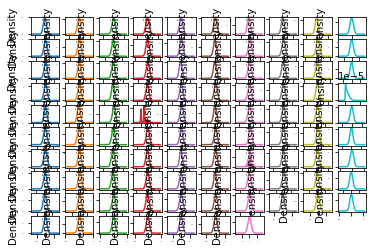

In [62]:
# create list of these numerical/continuous features
float_cols = df_train.select_dtypes(include='float').columns

# creating density plots for all continuous features
plt.close();
#df_train.loc[:, df_train.columns[:20]].plot(kind='density', subplots=True, layout=(11,11), sharex=False, legend=False, fontsize=1)
df_train[float_cols].plot(kind='density', subplots=True, layout=(10,10), sharex=False, legend=False, fontsize=1)
plt.show();

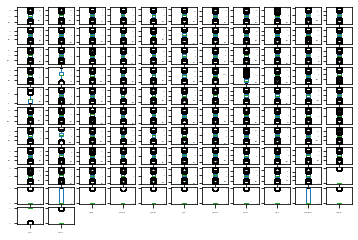

In [30]:
# Creating a box plot of features
plt.close();
df_train.plot(kind='box', subplots=True, layout=(11,11), sharex=False, sharey=False, fontsize=1); 
plt.show(); 

Neat. The kernel density plots suggest that these continuous numerical features look like normally distributed for the most part. And I can spot skews in some features (as noted above). 

The box plots are small (because of the number of features plotted at the same time). From what I can see, the features look like they're on varying scales. I'll explore rescaling all non-binary features later on in the data preprocessing stage.

Now, let's **plot a histogram of the target**:

In [49]:
df_train['y'].value_counts()

0    31856
1     8144
Name: y, dtype: int64

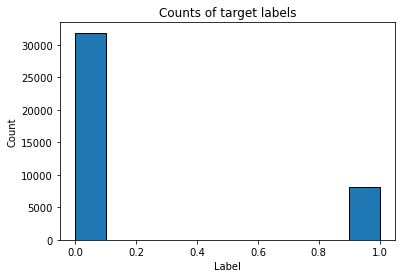

In [61]:
# plotting the distribution of labels in the target
plt.hist(df_train['y'], edgecolor = 'k'); 
plt.xlabel('Label'); plt.ylabel('Count'); 
plt.title('Counts of target labels');

The two classes are NOT balanced. Roughly a quarter of the values of the feature are ones and three-quarters are zeros.  

Now, let's **plot our new correlation matrix**, with all the cleaned features and the One-Hot encoded ones:

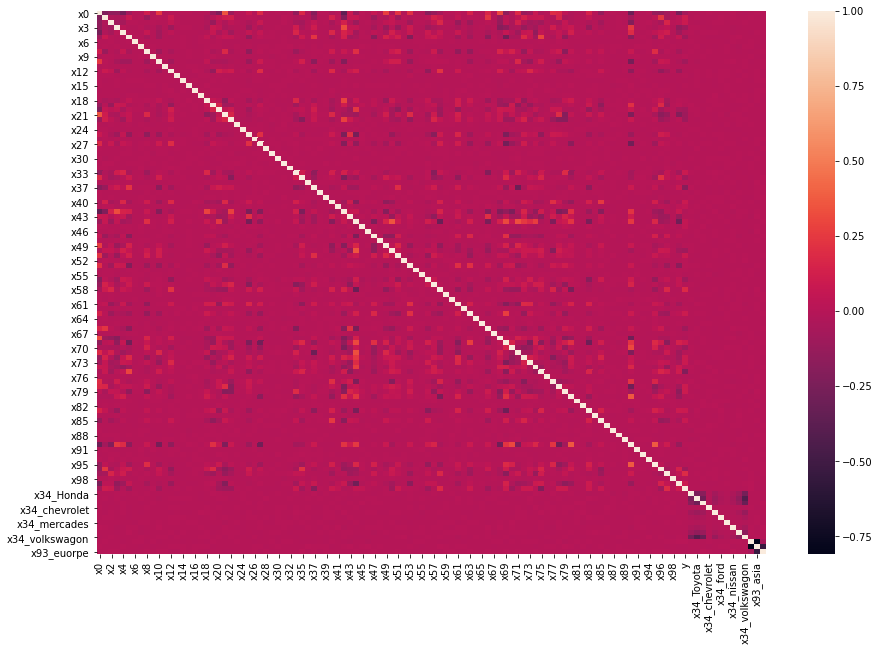

In [63]:
# plot correlation matrix using a heatmap (using full dataset) 
plt.figure(figsize = (15,10)); 
sns.heatmap(df_train.corr()); 

From the heatmap above, we can see that:  
- the majority of the features do not really correlate with each other (linearly speaking);  
- some features show medium correlation (positive or negative);  
- a few features show (maybe) strong and negative correlation, such as the One-Hot encoded features for continent (formerly feature 'x93');  
- interestingly, the target (y) shows very weak correlation with most other features, except for a few weak correlations (positive or negative).  

Generally speaking, the presence of high correlations would cause us to worry about potential multicollinearity issues. Conversely, having lots of features that are two weakly related could engender poor performance in machine learning algorithms. So we need to do some feature selection.  

But before this, let's rescale the data. This takes helps reduce the high variability in most features that we noted from summary statistics above. Also, it helps eliminate potential outliers that could introduce some biais into our models.  

Let's plot another correlation matrix, but with dataset without multicollinear features:

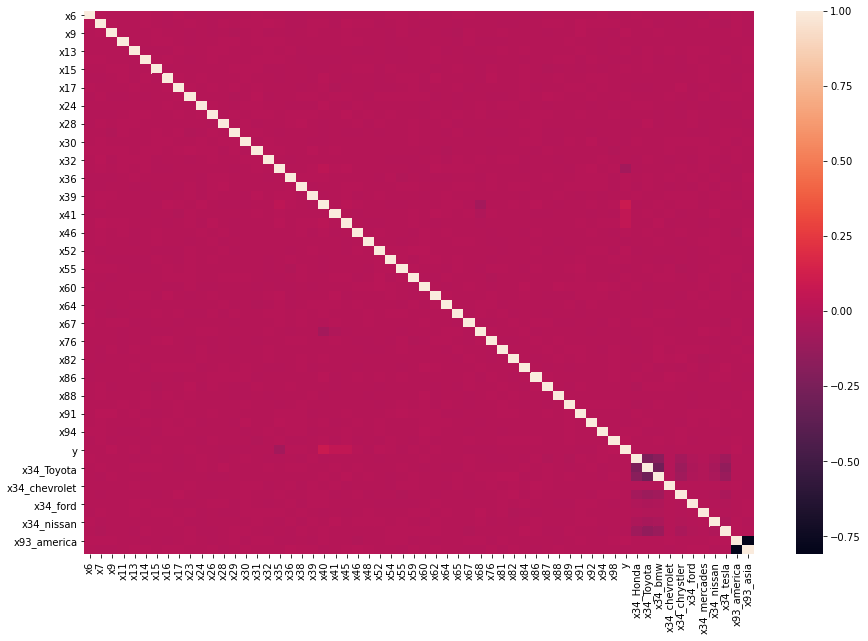

In [175]:
plt.figure(figsize = (15,10)); 
sns.heatmap(df_train_clean.corr()); 

There seems to not be much going on in this sub-dataset. The One-Hot encoded features show stronger negative correlation among themselves, which makes sense. For instance, someone cannot be from more than one continent at a time. 

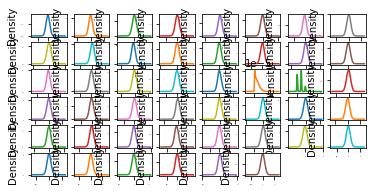

In [207]:
# create list of these numerical/continuous features
float_cols = df_train_clean.select_dtypes(include='float').columns

# creating density plots for all continuous features
plt.close();
#df_train.loc[:, df_train.columns[:20]].plot(kind='density', subplots=True, layout=(11,11), sharex=False, legend=False, fontsize=1)
df_train_clean[float_cols].plot(kind='density', subplots=True, layout=(8,8), sharex=False, legend=False, fontsize=1)
plt.show();

## Part 1.2: Cleaning the testing dataset  

I follow the same steps as above (when cleaning the training dataset).

In [96]:
# NOTE: I have downloaded the testing dataset to my working directory  
# Load testing dataset  
df_test = pd.read_csv('exercise_02_test.csv')

In [97]:
# Previewing the testing dataset
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 100 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x0      9997 non-null   float64
 1   x1      9998 non-null   float64
 2   x2      9999 non-null   float64
 3   x3      9996 non-null   float64
 4   x4      10000 non-null  float64
 5   x5      9995 non-null   float64
 6   x6      9999 non-null   float64
 7   x7      9996 non-null   float64
 8   x8      9999 non-null   float64
 9   x9      9998 non-null   float64
 10  x10     9998 non-null   float64
 11  x11     9998 non-null   float64
 12  x12     9999 non-null   float64
 13  x13     9997 non-null   float64
 14  x14     9998 non-null   float64
 15  x15     9995 non-null   float64
 16  x16     9998 non-null   float64
 17  x17     9999 non-null   float64
 18  x18     9999 non-null   float64
 19  x19     9999 non-null   float64
 20  x20     9998 non-null   float64
 21  x21     9998 non-null   float64
 22

In [91]:
# Checking the numbers of rows + columns are in this dataset
df_test.shape

(10000, 100)

The testing dataset contains 10K observations/rows and the same 100 explanatory features: 'x0' to 'x99' (as in the taining dataset). The testing dataset does NOT contain a 'y' column, as expected.

In [95]:
# display first and last 20 rows of the dataset
df_test.head(20).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
x0,6.63,3.8,31.9,15.3,-17.6,1.01,36.1,-2.05,-7.13,16.4,4.11,6.28,20.9,23,-4.02,16.9,29.3,-3.88,-6.45,-10.6
x1,54.5,-20.2,-61.5,-18.5,15.8,15.9,30.2,74.7,25.3,-21.8,43,28.7,50.5,-14.3,-32.4,-5.17,-57.9,33.6,-4.7,24.2
x2,15.3,-18.1,14.9,1.11,-18,10.1,-19.3,-36.2,28.6,-9.29,39.8,26.6,-71.3,-24.5,-16.1,25.1,-44,-29.7,7.01,45.1
x3,-0.795,-1.11,0.979,-2.72,-2,-2.12,-0.895,-0.8,-0.0556,1.75,-0.226,-0.96,-1.28,2.24,0.856,-1.67,-1.52,-1.29,0.999,-0.703
x4,22.5,-3.55,6.8,-5.51,-23.1,-28.8,-32.7,26.7,-6.33,1.02,2.78,20,-24.8,3.03,-21.4,-14.6,-9.65,-4.71,-15.4,-1.86
x5,-29.2,-4.03,-29.7,2.25,-15.9,1.66,-10.4,-22.6,5.18,-0.702,5.56,11.5,-36.6,-15.2,36.7,14.6,-2.76,30.4,-10.1,1.47
x6,1.44,1.97,4.78,-8.02,-17.1,-3.27,-5.47,2.25,14.9,-1.81,2.7,4.46,-9.49,7.73,-0.631,-3.67,5.8,-6.03,19.7,-10.9
x7,-4.55,-1.97,-2.68,3.64,4.1,-2.81,5.07,-2.85,0.0699,1.52,2.68,-4.36,7.37,4.53,-11.7,-6.54,-0.209,5.98,4.47,-12.8
x8,5.93,13.2,-17.1,-13,-7.76,-2.49,-16.5,-3.62,11.5,-5.46,12,-15.7,1.34,-4.13,16.4,-6.42,6.65,-22.9,-9.43,-16
x9,-3.32,-4.26,0.903,-1.75,-2.55,3.25,3.65,2.83,3.31,2.08,0.757,-1.91,1.65,2.54,2.14,-3.25,-4.07,0.43,3.53,-3.14


In [98]:
df_test.tail(20).T

,9980,9981,9982,9983,9984,9985,9986,9987,9988,9989,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
x0,7.39,2.82,7.31,24.2,16.9,6.87,-1.68,-9.24,1.74,4.38,11.7,-8.37,24.9,30.5,19.4,-11.2,-11.5,30.6,22.7,16.7
x1,-15.1,-6.25,-32.5,-20,-67.4,-53.3,-12,-73.3,-9.16,-46.7,-57.8,-3.58,0.501,-14.1,-5.83,-30.6,-15.2,16.3,4.4,16.5
x2,-82.9,5.73,-22.1,64.3,-32,-41,16.3,22.5,-36.7,11.7,-67,-27.7,32,55.6,-95,59,9.74,7.15,-41.7,-34.8
x3,-0.0411,0.965,-0.572,-1.24,1.52,0.731,2.71,1.57,-0.337,-0.0227,0.407,-1.74,-1.81,0.518,-1.16,0.401,0.706,0.321,-0.739,-0.818
x4,21,-9.81,23.5,7.05,5.01,-1.53,-7.08,-7.27,-8.55,27.9,-13.5,-8.35,-0.485,-28.2,12.4,-6.74,-1.68,-24.4,-12.9,-15.9
x5,0.317,4.85,-21.5,-25.3,-3.95,9.34,-14.6,-8.51,10.8,1.69,5.77,12.6,8.14,14.7,-12.7,6.65,-21,10.9,-21,-18
x6,13.5,-20.3,-8.53,2.01,6.34,4.77,3.93,-0.63,-8.4,-5.35,-20.4,10.2,-2.34,-4.15,-4.86,-5.08,13.9,-1.1,-4.32,1.66
x7,-2.71,-3.85,3.58,-12.1,-3.65,7.03,4.48,10.5,-6.55,-3.2,-8.6,-1.48,-6.84,0.379,10.2,4.35,-8.04,0.762,7.07,-7.13
x8,-11.5,6.27,14.9,-22.7,18.3,15.1,-16,-26.3,-10.4,-1.92,-14.1,-20.2,-19.4,7.69,-37.6,5.38,-1.5,4.98,4.11,-13.6
x9,-1.62,-0.715,1.03,-1.86,0.319,-3.38,4.63,-0.236,2.8,2.48,-0.00627,-4.71,4.51,1.68,1.47,-1.84,-3.22,0.865,0.271,1.75


In [99]:
# Summary statistics of numerical features
df_test.describe()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x36,x37,x38,x39,x40,x42,x43,x44,x46,x47,x48,x49,x50,x51,x52,x53,x54,x55,x56,x57,x58,x59,x60,x61,x62,x63,x64,x65,x66,x67,x69,x70,x71,x72,x73,x74,x75,x76,x77,x78,x79,x80,x81,x82,x83,x84,x85,x86,x87,x88,x89,x90,x91,x92,x94,x95,x96,x97,x98,x99
count,9997.000,9998.000,9999.000,9996.000,10000.000,9995.000,9999.000,9996.000,9999.000,9998.000,9998.000,9998.000,9999.000,9997.000,9998.000,9995.000,9998.000,9999.000,9999.000,9999.000,9998.000,9998.000,9999.000,9999.000,9998.000,10000.000,9998.000,9999.000,9999.000,9999.000,9999.000,9998.000,9997.000,9998.000,9.998e+03,9998.000,10000.000,9999.000,9998.000,9997.000,10000.000,9997.000,9996.000,9998.000,9996.000,9997.000,10000.000,9998.000,9997.000,10000.000,9999.000,9994.000,9999.000,9998.000,9999.000,9999.000,9998.000,9998.000,9997.000,9999.000,9999.000,9998.000,9998.000,9999.000,9999.000,9999.000,9999.000,9998.000,9999.000,9997.000,9998.000,9999.000,9997.000,9997.000,9996.000,10000.000,9998.000,9998.000,9999.000,10000.000,9999.000,9999.000,9995.000,9998.000,9998.000,9999.000,9999.000,9999.000,9996.000,9999.000,9998.000,10000.000,9999.000,9998.000
mean,3.494,-8.097,1.288,-0.075,0.132,-0.735,-0.089,0.062,-2.948,-0.039,7.474,0.005,-4.648,0.017,-0.023,0.038,0.040,0.021,7.336,0.075,3.313,6.392,-1.406,0.041,0.037,0.059,0.004,9.528,0.002,0.010,-0.043,-0.050,-0.007,-0.642,-2.371e-03,4.207,0.014,0.022,2.157,-0.157,0.155,-21.684,-0.006,0.015,-0.009,-0.134,3.821,-7.065,0.002,0.380,-0.016,0.018,-1.795,-0.573,-0.949,-0.004,0.078,0.021,-0.071,-2.322,0.011,0.022,-2.259,-0.058,-8.097,6.961,0.054,-1.488,-5.083,0.245,5.516,0.015,0.083,-0.753,0.725,-0.154,0.017,-0.044,0.308,-0.044,-3.598,0.014,0.124,0.037,0.005,-7.673,0.020,0.087,-0.013,0.262,-1.043,-2.726,0.076,0.049
std,16.373,37.195,38.123,1.490,16.346,15.554,8.990,7.000,13.089,2.912,40.292,4.487,18.298,2.542,3.050,8.587,4.098,6.523,27.076,20.640,16.518,35.484,37.667,7.587,3.726,3.925,0.557,40.153,2.856,0.849,3.253,5.687,1.605,3.544,1.677e+00,31.844,7.465,9.785,34.362,21.651,15.094,87.075,8.361,4.453,3.678,12.640,20.033,37.237,0.991,24.681,5.064,3.529,30.128,35.199,6.382,6.071,5.578,15.023,7.490,14.067,7.981,1.246,38.448,3.791,67.198,37.213,35.909,7.808,27.380,26.854,35.568,5.656,35.513,3.939,22.076,19.068,9.750,5.259,4.934,5.238,18.513,0.591,8.203,3.804,4.094,96.199,2.643,4.614,2.169,27.341,23.844,18.348,8.504,1.134
min,-62.382,-153.367,-152.920,-6.467,-56.532,-59.441,-33.686,-26.500,-47.112,-10.503,-157.597,-17.425,-74.600,-9.229,-11.097,-32.834,-16.044,-24.503,-95.925,-84.672,-52.418,-122.137,-140.660,-37.485,-12.958,-14.823,-2.544,-158.740,-11.702,-3.071,-11.122,-20.566,-5.543,-14.327,-5.605e+00,-123.228,-29.300,-38.006,-137.432,-72.888,-65.336,-415.433,-33.835,-15.711,-15.854,-49.346,-69.620,-147.237,-3.749,-93.475,-19.090,-13.600,-128.403,-149.001,-28.080,-20.562,-20.876,-63.076,-29.643,-58.109,-31.006,-4.328,-163.888,-14.467,-317.946,-130.761,-147.252,-35.309,-105.940,-110.390,-134.509,-21.867,-141.057,-14.710,-93.715,-67.684,-36.173,-19.718,-17.688,-20.889,-70.273,-2.201,-29.101,-14.245,-15.353,-394.161,-9.559,-17.339,-8.723,-113.705,-96.533,-74.308,-34.629,-4.683
25%,-7.541,-32.842,-24.149,-1.096,-10.846,-11.247,-6.147,-4.579,-11.624,-1.996,-19.653,-3.056,-16.888,-1.727,-2.042,-5.817,-2.760,-4.435,-10.622,-13.774,-7.990,-17.421,-27.171,-5.087,-2.465,-2.577,-0.369,-17.532,-1.938,-0.553,-2.226,-3.774,-1.102,-2.987,-1.120e+00,-17.360,-5.092,-6.563,-21.334,-14.751,-9.913,-75.951,-5.654,-2.967,-2.527,-8.512,-9.805,-31.732,-0.668,-16.501,-3.430,-2.336,-22.288,-24.429,-5.222,-4.063,-3.765,-9.945,-5.024,-11.721,-5.342,-0.815,-28.234,-2.562,-52.841,-18.078,-23.566,-6.715,-23.487,-18.127,-17.743,-3.837,-23.941,-3.494,-14.101,-13.230,-6.691,-3.511,-2.966,-3.631,-16.156,-0.380,-5.433,-2.519,-2.780,-71.058,-1.742,-3.050,-1.469,-18.416,-16.773,-15.055,-5.701,-0.729
50%,3.596,-8.463,1.891,-0.086,0.290,-0.688,-0.095,0.147,-2.958,-0.014,

In [100]:
# Check the skewness of univariate distributions
df_test.skew()

x0    -5.928e-03
x1     3.461e-02
x2    -4.194e-02
x3     2.361e-02
x4    -1.131e-03
x5     1.080e-02
x6     1.989e-02
x7    -4.457e-02
x8    -9.665e-03
x9    -2.052e-03
x10   -5.578e-02
x11    9.185e-03
x12   -4.233e-03
x13   -1.117e-03
x14   -1.539e-02
x15   -8.227e-03
x16    1.366e-02
x17    1.792e-02
x18   -2.771e-02
x19    9.594e-02
x20    3.851e-02
x21    1.573e-02
x22    5.860e-02
x23    6.638e-03
x24   -3.965e-02
x25    3.074e-02
x26   -5.431e-02
x27    2.994e-02
x28    1.232e-02
x29   -3.473e-02
x30    4.666e-02
x31   -1.661e-02
x32    1.965e-02
x33   -1.230e-02
x36   -1.255e-02
x37    2.509e-02
x38    5.329e-03
x39    1.363e-02
x40    7.277e-02
x42    2.714e-02
x43   -4.394e-02
x44   -1.453e-01
x46   -1.033e-03
x47    1.223e-02
x48    1.559e-03
x49   -7.782e-02
x50    2.989e-02
x51   -3.133e-02
x52   -2.163e-02
x53    3.149e-02
x54    1.083e-02
x55    6.171e-03
x56   -4.649e-02
x57    7.951e-02
x58   -1.752e-02
x59    1.931e-02
x60    9.800e-03
x61   -8.762e-02
x62   -8.017e-

In [101]:
# What types of variables are the features and target in this dataset?
df_test.dtypes

x0     float64
x1     float64
x2     float64
x3     float64
x4     float64
x5     float64
x6     float64
x7     float64
x8     float64
x9     float64
x10    float64
x11    float64
x12    float64
x13    float64
x14    float64
x15    float64
x16    float64
x17    float64
x18    float64
x19    float64
x20    float64
x21    float64
x22    float64
x23    float64
x24    float64
x25    float64
x26    float64
x27    float64
x28    float64
x29    float64
x30    float64
x31    float64
x32    float64
x33    float64
x34     object
x35     object
x36    float64
x37    float64
x38    float64
x39    float64
x40    float64
x41     object
x42    float64
x43    float64
x44    float64
x45     object
x46    float64
x47    float64
x48    float64
x49    float64
x50    float64
x51    float64
x52    float64
x53    float64
x54    float64
x55    float64
x56    float64
x57    float64
x58    float64
x59    float64
x60    float64
x61    float64
x62    float64
x63    float64
x64    float64
x65    float64
x66    flo

In [102]:
# print list of string features only
df_test.select_dtypes(include=['object'])

,x34,x35,x41,x45,x68,x93
0,volkswagon,wed,$2475.46,-0.01%,Aug,america
1,bmw,thurday,$-1109.1,0.0%,Jun,asia
2,volkswagon,thurday,$-187.7,-0.0%,sept.,asia
3,Toyota,wednesday,$525.65,0.01%,July,asia
4,Toyota,thurday,$-1113.53,0.0%,Apr,asia
...,...,...,...,...,...,...
9995,bmw,wednesday,$222.04,-0.01%,Jun,asia
9996,Toyota,wed,$342.34,0.01%,Jun,euorpe
9997,bmw,thur,$2305.86,0.0%,Apr,asia
9998,nissan,thurday,$-947.53,-0.0%,Aug,asia


Features 'x41' and 'x45' are actually numeric/continuous variables; not string. I can fix this by removing the 'undesirable' caracters: '$' and '%'.

In [103]:
# converting 'x41' and 'x45' to float
df_test['x41'] = df_test['x41'].str.replace(r'\D', '').astype(float)
df_test['x45'] = df_test['x45'].str.replace(r'\D', '').astype(float)

In [104]:
# checking that 'x41' and 'x45' are not string features anymore
df_test.select_dtypes(include=['object']) # not in the list. Great!

,x34,x35,x68,x93
0,volkswagon,wed,Aug,america
1,bmw,thurday,Jun,asia
2,volkswagon,thurday,sept.,asia
3,Toyota,wednesday,July,asia
4,Toyota,thurday,Apr,asia
...,...,...,...,...
9995,bmw,wednesday,Jun,asia
9996,Toyota,wed,Jun,euorpe
9997,bmw,thur,Apr,asia
9998,nissan,thurday,Aug,asia


In [105]:
# how many missing values do we have per feature?
df_test.isna().sum()

x0     3
x1     2
x2     1
x3     4
x4     0
x5     5
x6     1
x7     4
x8     1
x9     2
x10    2
x11    2
x12    1
x13    3
x14    2
x15    5
x16    2
x17    1
x18    1
x19    1
x20    2
x21    2
x22    1
x23    1
x24    2
x25    0
x26    2
x27    1
x28    1
x29    1
x30    1
x31    2
x32    3
x33    2
x34    2
x35    0
x36    2
x37    2
x38    0
x39    1
x40    2
x41    2
x42    3
x43    0
x44    3
x45    2
x46    4
x47    2
x48    4
x49    3
x50    0
x51    2
x52    3
x53    0
x54    1
x55    6
x56    1
x57    2
x58    1
x59    1
x60    2
x61    2
x62    3
x63    1
x64    1
x65    2
x66    2
x67    1
x68    3
x69    1
x70    1
x71    1
x72    2
x73    1
x74    3
x75    2
x76    1
x77    3
x78    3
x79    4
x80    0
x81    2
x82    2
x83    1
x84    0
x85    1
x86    1
x87    5
x88    2
x89    2
x90    1
x91    1
x92    1
x93    1
x94    4
x95    1
x96    2
x97    0
x98    1
x99    2
dtype: int64

Use **mode filling** and **median filling** respectively, to impute missing values for string and numeric features.

In [106]:
# loops over the list of column names
for item in list(df_test.columns.values): 
    # if feature is string
    if df_test[item].dtypes=='object': 
        # extract mode value for this feature
        mode_item = df_test[item].mode()[0] 
        # mode fill this feature
        df_test[item] = df_test[item].fillna(mode_item) 
        # if feature is numeric
    elif df_test[item].dtypes=='float': 
        # extract median value for this feature
        median_item = df_test[item].median() 
        # median fill this feature
        df_test[item] = df_test[item].fillna(median_item) 
# NOTE: the mode always return the modal value and its index, this means we can have more than one returned modal value. We chose the 2nd one by indexing with [0].

In [107]:
# checking to make sure that all missing values have been properly imputed
df_test.isna().sum() # Great!

x0     0
x1     0
x2     0
x3     0
x4     0
x5     0
x6     0
x7     0
x8     0
x9     0
x10    0
x11    0
x12    0
x13    0
x14    0
x15    0
x16    0
x17    0
x18    0
x19    0
x20    0
x21    0
x22    0
x23    0
x24    0
x25    0
x26    0
x27    0
x28    0
x29    0
x30    0
x31    0
x32    0
x33    0
x34    0
x35    0
x36    0
x37    0
x38    0
x39    0
x40    0
x41    0
x42    0
x43    0
x44    0
x45    0
x46    0
x47    0
x48    0
x49    0
x50    0
x51    0
x52    0
x53    0
x54    0
x55    0
x56    0
x57    0
x58    0
x59    0
x60    0
x61    0
x62    0
x63    0
x64    0
x65    0
x66    0
x67    0
x68    0
x69    0
x70    0
x71    0
x72    0
x73    0
x74    0
x75    0
x76    0
x77    0
x78    0
x79    0
x80    0
x81    0
x82    0
x83    0
x84    0
x85    0
x86    0
x87    0
x88    0
x89    0
x90    0
x91    0
x92    0
x93    0
x94    0
x95    0
x96    0
x97    0
x98    0
x99    0
dtype: int64

In [108]:
# Check the number of unique classes in the 4 string features
cat_cols = df_test.select_dtypes(include='object').columns

In [109]:
cat_cols = df_test.select_dtypes(include='object').columns

for col in cat_cols:
    print("Number of classes in {}:".format(col))
    print(df_test[col].nunique())
    print('--------------------------')

Number of classes in x34:
10
--------------------------
Number of classes in x35:
8
--------------------------
Number of classes in x68:
12
--------------------------
Number of classes in x93:
3
--------------------------


Display classes for each of the 4 features.

In [110]:
for item in ['x34','x35','x68','x93']:
    print("Classes in {}:".format(item))
    print(df_test[item].value_counts())
    print('--------------------------')

Classes in x34:
volkswagon    3236
Toyota        2616
bmw           1844
Honda         1293
tesla          583
chrystler      281
nissan          95
ford            40
mercades        10
chevrolet        2
Name: x34, dtype: int64
--------------------------
Classes in x35:
wed          3745
thurday      3285
wednesday    1496
thur         1117
tuesday       218
friday        121
monday         13
fri             5
Name: x35, dtype: int64
--------------------------
Classes in x68:
July       2778
Jun        2385
Aug        1964
May        1208
sept.       868
Apr         437
Oct         228
Mar          82
Nov          36
Feb           6
Dev           5
January       3
Name: x68, dtype: int64
--------------------------
Classes in x93:
asia       8869
america     788
euorpe      343
Name: x93, dtype: int64
--------------------------


Cleaning feature 'x35':

In [111]:
# relabeling 'x35'
df_test['x35'] = df_test['x35'].replace('wed','wednesday')
df_test['x35'] = df_test['x35'].replace('thurday','thursday')
df_test['x35'] = df_test['x35'].replace('thur','thursday')
df_test['x35'] = df_test['x35'].replace('fri','friday')

In [112]:
# converting 'x35' to numerical
df_test['x35']=df_test['x35'].map({'monday':1,
                                     'tuesday':2,
                                     'wednesday':3,
                                     'thursday':4,
                                     'friday':5})

In [113]:
# checking to make sure 'x35' is all clean
df_test['x35'].value_counts() # Great!

3    5241
4    4402
2     218
5     126
1      13
Name: x35, dtype: int64

In [114]:
# checking summary statistics for 'x35'
df_test['x35'].describe()

count    10000.000
mean         3.441
std          0.568
min          1.000
25%          3.000
50%          3.000
75%          4.000
max          5.000
Name: x35, dtype: float64

Cleaning feature 'x68':

In [115]:
# relabeling 'x68'
df_test['x68'] = df_test['x68'].replace('January','Jan')
df_test['x68'] = df_test['x68'].replace('sept.','Sept')
df_test['x68'] = df_test['x68'].replace('Dev','Dec')

In [116]:
# converting 'x68' to numerica
df_test['x68']=df_test['x68'].map({'Jan':1,
                                     'Feb':2,
                                     'Mar':3,
                                     'Apr':4,
                                     'May':5,
                                     'Jun':6,
                                     'July':7,
                                     'Aug':8,
                                     'Sept':9,
                                     'Oct':10,
                                    'Nov':11,
                                    'Dec':12})

In [117]:
# checking to make sure 'x68' is all clean now
df_test['x68'].value_counts()

7     2778
6     2385
8     1964
5     1208
9      868
4      437
10     228
3       82
11      36
2        6
12       5
1        3
Name: x68, dtype: int64

Use One-Hot encoding on 'x34' and 'x93':

In [118]:
from sklearn.preprocessing import OneHotEncoder

# list of features to encode 
cats = ['x34','x93']

# run One-Hot encoding
df_test_onehot = pd.get_dummies(df_test, columns=cats)
df_test=df_test_onehot.loc[:, df_test_onehot.columns]

In [119]:
# checking that these features are well encoded, by showing descriptive statistics for all the dataset  
df_test.describe() # Perfecto! :)  

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x35,x36,x37,x38,x39,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49,x50,x51,x52,x53,x54,x55,x56,x57,x58,x59,x60,x61,x62,x63,x64,x65,x66,x67,x68,x69,x70,x71,x72,x73,x74,x75,x76,x77,x78,x79,x80,x81,x82,x83,x84,x85,x86,x87,x88,x89,x90,x91,x92,x94,x95,x96,x97,x98,x99,x34_Honda,x34_Toyota,x34_bmw,x34_chevrolet,x34_chrystler,x34_ford,x34_mercades,x34_nissan,x34_tesla,x34_volkswagon,x93_america,x93_asia,x93_euorpe
count,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,1.000e+04,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,1.000e+04,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000
mean,3.494,-8.097,1.288,-0.075,0.132,-0.735,-0.089,0.062,-2.948,-0.039,7.474,0.005,-4.648,0.017,-0.023,0.038,0.040,0.021,7.336,0.075,3.313,6.392,-1.406,0.041,0.037,0.059,0.004,9.528,0.002,0.010,-0.043,-0.050,-0.007,-0.642,3.441,-2.371e-03,4.207,0.014,0.022,2.156,71937.461,-0.157,0.155,-21.684,0.759,-0.006,0.015,-0.009,-0.134,3.821,-7.065,0.002,0.380,-0.016,0.018,-1.795,-0.574,-0.949,-0.004,0.078,0.021,-0.071,-2.322,0.011,0.022,-2.259,-0.058,6.806,-8.097,6.961,0.054,-1.488,-5.083,0.245,5.516,0.015,0.083,-0.753,0.725,-0.154,0.017,-0.044,0.308,-0.044,-3.598,0.014,0.124,0.037,0.005,-7.673,0.020,0.087,-0.013,0.262,-1.043,-2.726,0.076,0.049,0.129,0.262,0.184,2.000e-04,0.028,0.004,0.001,0.009,0.058,0.324,0.079,0.887,0.034
std,16.371,37.191,38.121,1.489,16.346,15.550,8.990,6.999,13.088,2.911,40.288,4.487,18.297,2.542,3.049,8.585,4.098,6.523,27.074,20.639,16.517,35.481,37.665,7.587,3.725,3.925,0.557,40.151,2.856,0.849,3.253,5.686,1.605,3.544,0.568,1.677e+00,31.841,7.465,9.785,34.359,61022.421,21.648,15.094,87.062,0.710,8.359,4.453,3.677,12.638,20.033,37.234,0.991,24.681,5.063,3.528,30.127,35.195,6.381,6.071,5.578,15.021,7.489,14.066,7.980,1.246,38.444,3.791,1.433,67.195,37.211,35.907,7.807,27.379,26.850,35.565,5.656,35.508,3.939,22.072,19.068,9.749,5.258,4.934,5.238,18.512,0.591,8.200,3.804,4.094,96.194,2.643,4.614,2.169,27.340,23.842,18.348,8.503,1.134,0.336,0.440,0.388,1.414e-02,0.165,0.063,0.032,0.097,0.234,0.468,0.269,0.317,0.182
min,-62.382,-153.367,-152.920,-6.467,-56.532,-59.441,-33.686,-26.500,-47.112,-10.503,-157.597,-17.425,-74.600,-9.229,-11.097,-32.834,-16.044,-24.503,-95.925,-84.672,-52.418,-122.137,-140.660,-37.485,-12.958,-14.823,-2.544,-158.740,-11.702,-3.071,-11.122,-20.566,-5.543,-14.327,1.000,-5.605e+00,-123.228,-29.300,-38.006,-137.432,7.000,-72.888,-65.336,-415.433,0.000,-33.835,-15.711,-15.854,-49.346,-69.620,-147.237,-3.749,-93.475,-19.090,-13.600,-128.403,-149.001,-28.080,-20.562,-20.876,-63.076,-29.643,-58.109,-31.006,-4.328,-163.888,-14.467,1.000,-317.946,-130.761,-147.252,-35.309,-105.940,-110.390,-134.509,-21.867,-141.057,-14.710,-93.715,-67.684,-36.173,-19.718,-17.688,-20.889,-70.273,-2.201,-29.101,-14.245,-15.353,-394.161,-9.559,-17.339,-8.723,-113.705,-96.533,-74.308,-34.629,-4.683,0.000,0.000,0.000,0.000e+00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,-7.541,-32.842,-24.148,-1

In [120]:
# Just curious to see what specific data types were assigned to my One-Hot encoded features
df_test.dtypes # 'uint8' is Unsigned integer (0 to 255) in NumPy  

x0                float64
x1                float64
x2                float64
x3                float64
x4                float64
x5                float64
x6                float64
x7                float64
x8                float64
x9                float64
x10               float64
x11               float64
x12               float64
x13               float64
x14               float64
x15               float64
x16               float64
x17               float64
x18               float64
x19               float64
x20               float64
x21               float64
x22               float64
x23               float64
x24               float64
x25               float64
x26               float64
x27               float64
x28               float64
x29               float64
x30               float64
x31               float64
x32               float64
x33               float64
x35                 int64
x36               float64
x37               float64
x38               float64
x39         

In [121]:
# just to make sure there are absolutely no missing values left :)
df_test_na = df_test.isna()
df_test_na.sum() # Amazing!

x0                0
x1                0
x2                0
x3                0
x4                0
x5                0
x6                0
x7                0
x8                0
x9                0
x10               0
x11               0
x12               0
x13               0
x14               0
x15               0
x16               0
x17               0
x18               0
x19               0
x20               0
x21               0
x22               0
x23               0
x24               0
x25               0
x26               0
x27               0
x28               0
x29               0
x30               0
x31               0
x32               0
x33               0
x35               0
x36               0
x37               0
x38               0
x39               0
x40               0
x41               0
x42               0
x43               0
x44               0
x45               0
x46               0
x47               0
x48               0
x49               0
x50               0


Let's check if there are any duplicate entries in the dataset.

In [129]:
df_test.duplicated(keep='last').sum() # no duplicates. Fantastic!
# Note on option " keep='last' " : the last occurrence of each set of duplicated values is set on False and all others on True.

0

Yay! Finally done with cleaning. Time to have some fun with data modeling (and some feature transformation)!!! :)

# Part 2: Automated feature selection  

This process consists in automatically picking the features in our data that contribute the most to predicting our target (i.e., y). Using irrelevant or partially relevant features in the data can reduce the accuracy of many models, especially linear algorithms like logistic regression. Overall, feature selection helps reduce overfitting, while it also improves model accuracy and saves up on model training time.  

I use **Lasso regularization** routine to automate feature selection. Ridge regression would be another alternative. But Lasso is a popular choice among the regularization method options within the "embedded" feature selection category. Embedded methods employ an iterative training process. They're designed to carefully extract features which contribute the most to the training for a particular iteration. Regularization methods penalize a feature given a coefficient threshold. If the feature is irrelevant, Lasso penalizes its coefficient and makes it 0. Also Lasso penalizes features which provide redundant information by 'shrinking' them to 0. Hence the features with coefficient = 0 are removed and the rest are taken.

Lasso helps deal with the issue of multicollinearity that we identified above. Instead of manually getting rid of some explanatory features that seem to suffer from multicollinearity by using a VIF cut-off (e.g., 5 or 10), I let Lasso do this automatically.  

In [211]:
#features_lasso = features_stand
features_lasso = df_train_clean.drop(columns='y')
label = df_train_clean['y']

In [215]:
#features_lasso = features_stand
features_lasso = df_train.drop(columns='y')
label = df_train['y']

In [216]:
# import necessary library
from sklearn.linear_model import LassoCV

# fit Lasso and print information
reg = LassoCV()
reg.fit(features_lasso, label)
print('Best alpha using built-in LassoCV: %f' % reg.alpha_)
print('Best score using built-in LassoCV: %f' % reg.score(features_lasso, label))
coef = pd.Series(reg.coef_, index = features_lasso.columns)

Best alpha using built-in LassoCV: 1.208793
Best score using built-in LassoCV: 0.112954


In [217]:
print("Lasso picked " + str(sum(coef != 0)) + " features and eliminated the other " + str(sum(coef == 0)) + " features.")

Lasso picked 11 features and eliminated the other 98 features.


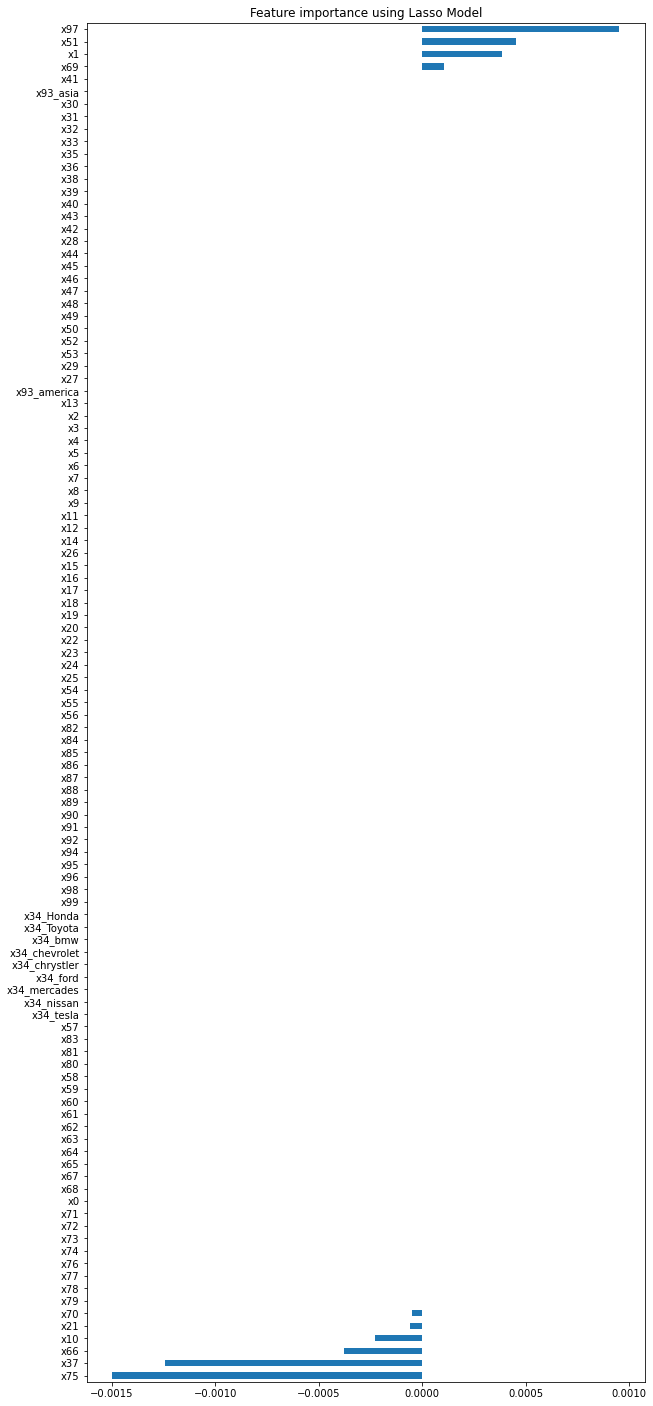

In [218]:
imp_coef = coef.sort_values();
#import matplotlib.rcParams['figure.figsize'] = (8.0, 10.0);
plt.figure(figsize = (10.0,25.0));
imp_coef.plot(kind = 'barh');
plt.title("Feature importance using Lasso Model");

In [219]:
# save list of features selected by Lasso to a list. Should be 94  
sel_features_list = features_lasso.columns[coef != 0].tolist()
len(sel_features_list) # 94 total. Great!

11

In [223]:
# So which explanatory features did Lasso pick?
sel_features_list

['x1', 'x10', 'x21', 'x37', 'x41', 'x51', 'x66', 'x69', 'x70', 'x75', 'x97']

### Summarizing and plotting the selected features using Lasso regularization

In [225]:
df_train[sel_features_list]

,x1,x10,x21,x37,x41,x51,x66,x69,x70,x75,x97
0,74.425,1.149,11.829,-10.839,44948.0,-22.567,59.935,-31.391,41.040,40.617,-2.126
1,24.321,-75.745,-12.457,57.917,52506.0,6.335,-42.651,8.682,36.205,-49.303,-36.031
2,-66.160,0.881,51.966,-12.991,5995.0,-18.293,-9.556,31.142,49.539,-19.707,26.213
3,33.211,27.644,30.156,37.659,22071.0,3.046,18.549,-13.934,82.130,-7.301,19.221
4,-26.718,-15.624,-10.493,-59.497,140559.0,-23.437,-29.846,57.852,-19.154,-2.752,-5.703
...,...,...,...,...,...,...,...,...,...,...,...
39995,63.862,53.105,18.780,11.734,21132.0,30.850,-6.949,-56.037,-30.688,49.416,-21.035
39996,-88.026,-39.450,-30.311,-1.972,93541.0,2.494,13.332,131.551,40.090,-8.803,-1.333
39997,64.295,78.404,6.642,-28.896,3382.0,-1.424,-25.214,-76.106,-43.621,68.032,-5.453
39998,-29.455,-4.752,-5.546,-9.029,16939.0,-23.769,31.949,-37.753,18.108,2.376,20.136


In [226]:
# summary statistics
df_train[sel_features_list].describe()

,x1,x10,x21,x37,x41,x51,x66,x69,x70,x75,x97
count,40000.000,40000.000,40000.000,40000.000,40000.000,40000.000,40000.000,40000.000,40000.000,40000.000,40000.000
mean,-7.789,7.549,6.595,4.815,72715.192,-6.535,-2.296,-7.436,6.885,5.418,-2.514
std,37.010,40.660,35.675,31.561,61270.332,37.163,38.478,67.431,37.411,35.654,18.552
min,-157.341,-170.569,-145.361,-127.652,1.000,-167.272,-177.824,-297.612,-135.730,-146.967,-73.909
25%,-32.729,-19.677,-17.328,-16.589,21648.750,-31.627,-28.452,-51.839,-17.959,-17.971,-15.023
50%,-8.020,7.754,6.751,4.487,58566.000,-6.048,-2.160,-7.219,6.964,5.604,-2.510
75%,16.844,34.976,30.303,25.969,108510.500,18.603,23.959,37.404,32.051,28.989,9.882
max,153.469,174.685,156.785,126.924,449646.000,153.279,204.417,308.325,159.477,144.548,76.120


In [236]:
df_train[sel_features_list].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      40000 non-null  float64
 1   x10     40000 non-null  float64
 2   x21     40000 non-null  float64
 3   x37     40000 non-null  float64
 4   x41     40000 non-null  float64
 5   x51     40000 non-null  float64
 6   x66     40000 non-null  float64
 7   x69     40000 non-null  float64
 8   x70     40000 non-null  float64
 9   x75     40000 non-null  float64
 10  x97     40000 non-null  float64
dtypes: float64(11)
memory usage: 3.4 MB


All the selected features are numerical/continuous. Very interesting!

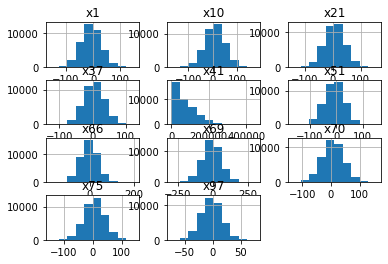

In [235]:
# Univariate histograms (Lasso selected features) 
plt.close();
df_train[sel_features_list].hist()
plt.show(); 

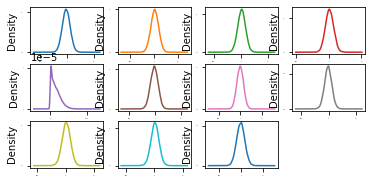

In [237]:
# Kernel density plots (Lasso selected features) 
plt.close();
#df_train.loc[:, df_train.columns[:20]].plot(kind='density', subplots=True, layout=(11,11), sharex=False, legend=False, fontsize=1)
df_train[sel_features_list].plot(kind='density', subplots=True, layout=(4,4), sharex=False, legend=False, fontsize=1)
plt.show();

These numerical features all look like normally distributed. Feature 'x69' looks maybe like an exponential distiribution. The fact that most of these features look more like Gaussian distributions is great news. Indeed, most machine learning algorithms assume this Gaussian distribution in their features.

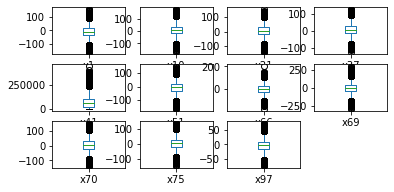

In [243]:
# Box and Whisker Plots (Lasso selected features) 
plt.close();
df_train[sel_features_list].plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False);
plt.show();

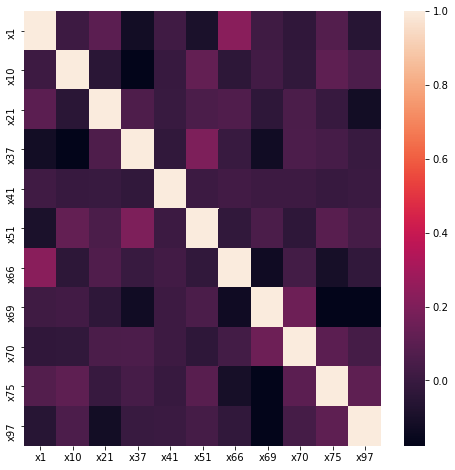

In [293]:
# plot correlation matrix using a heatmap (Lasso selected features) 
plt.figure(figsize = (8,8)); 
sns.heatmap(df_train[sel_features_list].corr());  

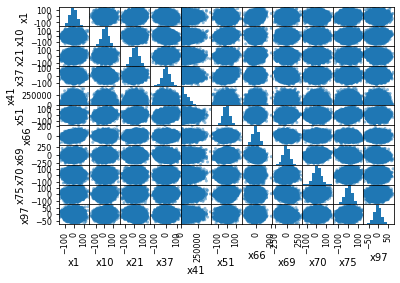

In [289]:
# Scatter plot matrix (using Lasso selected features) 

from pandas.plotting import scatter_matrix

plt.close();
scatter_matrix(df_train[sel_features_list]);
plt.show();

# Part 3: Feature engineering and modeling

## Part 3.1: Baseline machine learning models

I don't know how an a priori about which machine learning algorithms could work best on this dataset, given the lack of information about the target and other features. Therefore, I will use a 'spot checking' approach by trying a variety of techniques then dive deeper into the most promising ones. 

To both avoid data leakages and improve the performance of the algorithms, I will use the following practices:  
- 80% of the dataset for modeling and hold back 20% for validation. This is standard practice. I could consider other splits, such as 70/30 or two-third/one-third. 
- 10-fold cross validation: generally speaking, k-fold cross validation is the gold standard for evaluating the performance of a machine learning algorithm on unseen data with k set to 3, 5, or 10. Our dataset is relatively 'big', so cross validation is a good idea. I rely on the *KFold* module from *skit-learn* (https://scikit-learn.org/stable/modules/cross_validation.html).  
- pipeline to automate the machine learning workflow: this procedure helps maintain a strong separation between training and testing. The goal here is to ensure that all of the steps in the pipeline are constrained to the data available for the evaluation, such as the training dataset or each fold of the cross validation procedure. I rely on the *Pipeline* module from *skit-learn* (http://scikit-learn.org/stable/modules/pipeline.html).  

I start by establishing a baseline against which to evaluate the performance of my algorithms as I refine them further. I consider six algorithms with **low complexity** from these two categories:  
- *Linear algorithms*: Logistic Regression (LR) and Linear Discriminant Analysis (LDA).  
- *Nonlinear algorithms*: Classication and Regression Trees (CART, also known as Decision Tree), Support Vector Machines (SVM), Gaussian Naive Bayes (NB) and k-Nearest Neighbors (KNN).  

Next I try improving on the models with **feature transformation options**. The importance of **feature engineering** in data science can not be overstated. As Andrew Ng put it: 

                Coming up with features is difficult, time-consuming, requires expert knowledge. 
                        "Applied machine learning" is basically feature engineering.
                        - Andrew Ng, Machine Learning and AI via Brain simulations -
        
As part of this feature engineering step, I consider two standard data transformations:  
- *rescaling*: this rescales all non-binary features to fit into the same range between 0 and 1. It can matter when the data contains attributes with varying scales. In particular, this process can improve the optimization algorithms used in the core of machine learning algorithms like gradient descent, algorithms that weight inputs like regression, or algorithms that use distance measures like k-Nearest Neighbors. I rely on the *MinMaxScaler* module from *scikit-learn* (http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html); and  
- *standardizing*: this transforms non-binary featurs with a normal distribution but differing means and standard deviations to a standard normal distribution (with a mean of 0 and a standard deviation of 1). It is most suitable for techniques that assume a normal distribution in the input features and work better with rescaled data, logistic regression and linear discriminate analysis. I rely on the *StandardScaler* module from *scikit-learn* (http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)        
        
Next, I trying **tuning key hyparameters** in the machine learning algorithms, to see if this can improve their performance. I use *grid search* for this.

Next, I try **ensemble methods**, which are rather **high complexity** machine learning techniques. Ensemble methods consist in combining predictive models to try and improve prediction performance. I try tree based techniques; in particular *boosting* and *bagging*.  

At this point, I settle on my choice for the top 2 models. This allows me to ﬁnalize the models by training them on the entire training dataset and making predictions for the hold-out validation dataset in order to confirm our ﬁndings.

As stipulated in this problem, **I use the Area Under ROC Curve (AUC) metric for evaluating model performance**. This metric is appropriate because of the imbalance in the target and we're dealing with a binary classication problem. The AUC represents a model's ability to discriminate between positive and negative classes. AUC ranges in value from 0 to 1. An area of 0.5 represents a model that is as good as random guessing, while an area of 1.0 represents a model that made all predictions perfectly. Here's an interesting article on AUC: https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc.  

I set a seed for each model, for reproducibility purposes.  

In [245]:
# import necessary models from 'sklearn'  
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

I'll use these settings for all the models below:

In [250]:
# split the training dataset into a 'features' and a 'label' datasets
X = df_train[sel_features_list].loc[:, df_train[sel_features_list].columns != 'y']
Y = df_train['y']

# Split-out validation dataset
validation_size = 0.20
seed = 10 # for reproducibility
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=seed)

# Test options and evaluation metric
num_folds = 10 # for k-fold cross validation
seed = 10 # for reproducibility
scoring = 'roc_auc' # model performance evaluation

### Creating baseline models  

I don't know how an a priori about which machine learning algorithms could work best on this dataset, given the lack of information about the target and other features. Therefore, I will use a 'spot-checking' approach by trying a variety of techniques then dive deeper into the most promising ones.  

These baseline models offer a basis to compare the performance of future algorithm improvement attemps. I use no feature transformation (rescaling or standardization) techniques on these models. Also, I keep all default hyperparameters unchanged.

In [251]:
# Spot-check algorithms (baseline models)
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# storing and printing results  
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.784931 (0.007793)
LDA: 0.812636 (0.010465)
KNN: 0.591062 (0.010564)
CART: 0.650724 (0.011228)
NB: 0.810311 (0.010562)
SVM: 0.587804 (0.014111)


These baseline results are interesting. All the models have AUC values greater than 0.5, meaning that they perform better than random guessing. **Linear Discriminant Analysis (LDA) with and AUC of 0.812636** and **Gaussian Naive Bayes (NB) with and AUC of 0.810311** may be worth further study, as they appear to be the leading algorithms so far. Note that the first is a linear model and the second is a nonlinear model. 
 
To get a better appreciation of the model results, let's also graphically examine the distribution of the AUC values calculated across cross validation folds for each of the six machine learning techniques. Box and whisker plots are a good choice here.

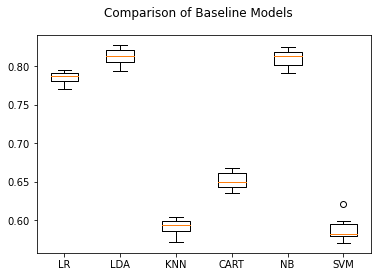

In [252]:
# Compare baseline algorithms
plt.close();
fig = plt.figure();
fig.suptitle('Comparison of Baseline Models');
ax = fig.add_subplot(111);
plt.boxplot(results);
ax.set_xticklabels(names);
plt.show();

Ahah! The picture shows clearly how there are two groups of models. The high performing onces are LDA, NB and LR. The least performing ones are SVM, KNN and CART. LR has a rather tight distribution (low variance).  

LDA and NB have higher variance relative to LR. 

The terrible performance of SVM is surprizing. 

After establishing these baselines, let's now explore some improvements to the models by transforming our features. I'll first scale the features into the 0-1 range, then I'll standardize them in the next step.

## Part 3.2: Model improvement with data transformation

#### Trying model improvement with feature rescaling

In [253]:
# Rescale non-binary features
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', MinMaxScaler(feature_range=(0, 1))),('LR',LogisticRegression())])))
pipelines.append(('ScaledLDA', Pipeline([('Scaler', MinMaxScaler(feature_range=(0, 1))),('LDA',LinearDiscriminantAnalysis())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', MinMaxScaler(feature_range=(0, 1))),('KNN',KNeighborsClassifier())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', MinMaxScaler(feature_range=(0, 1))),('CART',DecisionTreeClassifier())])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', MinMaxScaler(feature_range=(0, 1))),('NB',GaussianNB())])))
pipelines.append(('ScaledSVM', Pipeline([('Scaler', MinMaxScaler(feature_range=(0, 1))),('SVM', SVC())])))
results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledLR: 0.813869 (0.010316)
ScaledLDA: 0.812636 (0.010465)
ScaledKNN: 0.778785 (0.014154)
ScaledCART: 0.648175 (0.013278)
ScaledNB: 0.810448 (0.010566)
ScaledSVM: 0.861045 (0.007560)


And let's plot the results, just like we did before.

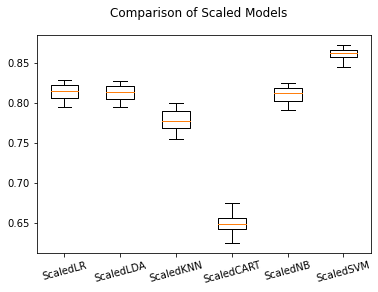

In [258]:
# Compare models
plt.close();
fig = plt.figure();
fig.suptitle('Comparison of Scaled Models');
ax = fig.add_subplot(111);
plt.boxplot(results);
ax.set_xticklabels(names);
plt.xticks(rotation=15);
plt.show();

Nice! Again, all the models perform better than random guessing (AUC > 0.5). Rescaling seems to have improved the perfomance of all of the algorithms, except CART whose AUC has decreased very slightly. 

Most notably, **SVM has jumped up as the most performing model with an AUC of 0.861045. LR comes in 2nd place with an AUC of 0.813869.** LDA and NB are in the same ballpark as LR. 

LDA has not responded at all to rescaling, its performance remaining exactly the same as with the unscaled data. 

CART shows the worst performance, with rescaled features.

Now, let's see if we might be able to improve the models better with an alternative feature transformation option.

#### Trying model improvement with feature standardization

In [259]:
# Standardize the dataset
pipelines = []
pipelines.append(('StandLR', Pipeline([('Scaler', StandardScaler()),('LR',LogisticRegression())])))
pipelines.append(('StandLDA', Pipeline([('Scaler', StandardScaler()),('LDA',LinearDiscriminantAnalysis())])))
pipelines.append(('StandKNN', Pipeline([('Scaler', StandardScaler()),('KNN',KNeighborsClassifier())])))
pipelines.append(('StandCART', Pipeline([('Scaler', StandardScaler()),('CART',DecisionTreeClassifier())])))
pipelines.append(('StandNB', Pipeline([('Scaler', StandardScaler()),('NB',GaussianNB())])))
pipelines.append(('StandSVM', Pipeline([('Scaler', StandardScaler()),('SVM', SVC())])))
results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

StandLR: 0.813781 (0.010280)
StandLDA: 0.812636 (0.010465)
StandKNN: 0.780449 (0.015070)
StandCART: 0.651482 (0.010292)
StandNB: 0.810448 (0.010566)
StandSVM: 0.854255 (0.009049)


And let's plot the results.

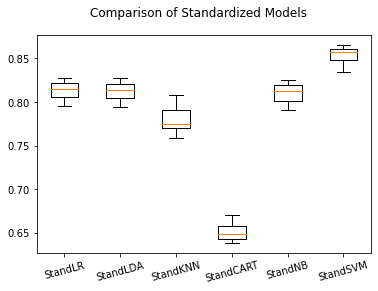

In [261]:
# Compare models
fig = plt.figure();
fig.suptitle('Comparison of Standardized Models');
ax = fig.add_subplot(111);
plt.boxplot(results);
ax.set_xticklabels(names);
plt.xticks(rotation=15);
plt.show();

Wow, this picture looks almost like the previous one! Standardizing features seems to have hurt the models overall. Both SVM and LR have decreased slightly, compared to their performance with rescaled features. These two algorithms remain the best performing ones.

Some takeaways:  

- The **top 2 models are SVM and LR with AUC values of 0.861045 and 0.813869, respectively**. 
- Feature rescaling works best for our dataset.  
- Note how SVM is a nonlinear machine learning algorithm, while LR is a simple linear model.  

Now let's see if we can tune some hyperparameters in SVM and LR to potentially improve their performance further! :)

## Part 3.3: Model improvement with parameter tuning

I will try doing this on these two best performing machine learning models so far:  
- Support Vector Machines (SVM), and  
- Logistic Regression (LR).  

Algorith tuning is the idea of finding the ''best'' values for the hyperparameters used in a machine learning algorithm. Conceptually, we can use different search strategies to identify a good and robust parameter (or set of parameters) for a model on a given problem. The challenge here is to improve model performance whilst preventing high variance (or overfitting) problems. Python *scikit-learn* offers several options, with *random search* and *grid search* being popular thanks to their simplicity. I will implement *grid search* because it's a more systematic way of solving the problem. This approach methodically builds and evaluates a model for each combination of algorithm parameters speciﬁed in a grid. I rely on the *GridSearchCV * library from *skit-learn* (http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).

As before, I'll perform 10-fold cross validation on the training dataset with standardized features.

In [264]:
# import necessary library
from sklearn.model_selection import GridSearchCV

##### Tuning SVM   

We can tune two key parameters of the SVM algorithm: the value of *C (how much to relax the margin)* and the *type of kernel*. The default for SVM (the SVC class) is to use the *Radial Basis Function (RBF)* kernel with a C value set to 1.0 (see https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html). I'll try a number of simpler kernel types and C values with less bias and more bias (less than and more than 1.0 respectively). 

In [266]:
# Tune scaled SVM
scaler = MinMaxScaler(feature_range=(0, 1)).fit(X_train)
rescaledX = scaler.transform(X_train)

# parameter tuning values
c_values = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7, 2.0]
kernel_values = ['linear', 'poly', 'rbf', 'sigmoid']

# grid search + 10-KFold validation
param_grid = dict(C=c_values, kernel=kernel_values)
model = SVC()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold) 
grid_result = grid.fit(rescaledX, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_)) 
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.863117 using {'C': 0.3, 'kernel': 'rbf'}
0.808228 (0.010403) with: {'C': 0.1, 'kernel': 'linear'}
0.860572 (0.007657) with: {'C': 0.1, 'kernel': 'poly'}
0.859597 (0.007156) with: {'C': 0.1, 'kernel': 'rbf'}
0.573076 (0.045434) with: {'C': 0.1, 'kernel': 'sigmoid'}
0.808347 (0.010368) with: {'C': 0.3, 'kernel': 'linear'}
0.858797 (0.008002) with: {'C': 0.3, 'kernel': 'poly'}
0.863117 (0.007078) with: {'C': 0.3, 'kernel': 'rbf'}
0.573077 (0.045433) with: {'C': 0.3, 'kernel': 'sigmoid'}
0.808422 (0.010365) with: {'C': 0.5, 'kernel': 'linear'}
0.857074 (0.008038) with: {'C': 0.5, 'kernel': 'poly'}
0.862836 (0.007128) with: {'C': 0.5, 'kernel': 'rbf'}
0.573077 (0.045434) with: {'C': 0.5, 'kernel': 'sigmoid'}
0.808444 (0.010340) with: {'C': 0.7, 'kernel': 'linear'}
0.856180 (0.008078) with: {'C': 0.7, 'kernel': 'poly'}
0.862084 (0.007206) with: {'C': 0.7, 'kernel': 'rbf'}
0.573076 (0.045434) with: {'C': 0.7, 'kernel': 'sigmoid'}
0.808452 (0.010332) with: {'C': 0.9, 'kernel': 'linear'

**The best model parameters for SVM are with a 'C' value of 0.3 and the RBF kernel. This yields an AUC of 0.863117** which is an improvement over the score of 0.861045 obtained above. 

##### Tuning LR   

Logistic Regression implements *L2 regularizeation* by default. Also, the model uses a *C* parameter that is a positive float with "default=1.0". *C* measures the inverse of regularization strength, such that smaller values specify stronger regularization (see https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html). In the steps below, I perform grid search on both of these two key parameters. For the penalty term, I try both *L1* regularization and *L2 regularizeation. And for *C*, I explore a range of positive floats, including the default value itself (i.e., 1.0). 

In [267]:
# Tune scaled Logistic Regression (LR)
scaler = MinMaxScaler(feature_range=(0, 1)).fit(X_train)
rescaledX = scaler.transform(X_train)

# parameter tuning values
c_values = [0.001,.009,0.01,.09,1,5,10,25]
penalty_values = ['l1', 'l2']

# grid search + 10-KFold validation
param_grid = dict(C=c_values, penalty=penalty_values)
model = LogisticRegression()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold) 
grid_result = grid.fit(rescaledX, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_)) 
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.814036 using {'C': 0.09, 'penalty': 'l2'}
nan (nan) with: {'C': 0.001, 'penalty': 'l1'}
0.806198 (0.010835) with: {'C': 0.001, 'penalty': 'l2'}
nan (nan) with: {'C': 0.009, 'penalty': 'l1'}
0.810787 (0.010719) with: {'C': 0.009, 'penalty': 'l2'}
nan (nan) with: {'C': 0.01, 'penalty': 'l1'}
0.811069 (0.010693) with: {'C': 0.01, 'penalty': 'l2'}
nan (nan) with: {'C': 0.09, 'penalty': 'l1'}
0.814036 (0.010423) with: {'C': 0.09, 'penalty': 'l2'}
nan (nan) with: {'C': 1, 'penalty': 'l1'}
0.813865 (0.010314) with: {'C': 1, 'penalty': 'l2'}
nan (nan) with: {'C': 5, 'penalty': 'l1'}
0.813798 (0.010292) with: {'C': 5, 'penalty': 'l2'}
nan (nan) with: {'C': 10, 'penalty': 'l1'}
0.813786 (0.010287) with: {'C': 10, 'penalty': 'l2'}
nan (nan) with: {'C': 25, 'penalty': 'l1'}
0.813782 (0.010283) with: {'C': 25, 'penalty': 'l2'}


The best model parameters for LR are with a 'C' value of 0.09 and L2 regularization. This yields an AUC of 0.814036 which is an improvement over the score of 0.813869 obtained above. 

**So far:**  
- Parameter tuning has successfully improved the performance of our top 2 modules;  
- SVM is the best model so far, with rescaled features, a 'C' value of 0.3 and the RBF kernel. This yields an AUC of 0.863117. 
- LR is the 2nd best model, with rescaled features, a 'C' value of 0.09 and L2 regularization. This yields an AUC of 0.814036.

## Part 3.4: Ensemble Models  

Another way that we can improve the performance of algorithms on this problem is by using ensemble methods. In this section, I will evaluate four diﬀerent ensemble machine learning algorithms, including two **boosting** and two **bagging** methods:  

- Boosting Methods: AdaBoost (AB) and Gradient Boosting (GBM)  
- Bagging Methods: Random Forests (RF) and Extra Trees (ET)  

All of these four ensemble algorithms are based on decision trees, so they're less sensitive to data distributions. Therefore, I won't use feature standardization. But I'll use 10-fold cross validation as before.

In [270]:
# import necessary libraries
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [271]:
# creating ensembles methods  
ensembles = []
ensembles.append(('AB', AdaBoostClassifier())) 
ensembles.append(('GBM', GradientBoostingClassifier())) 
ensembles.append(('RF', RandomForestClassifier())) 
ensembles.append(('ET', ExtraTreesClassifier())) 
results = []
names = []
for name, model in ensembles:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring) 
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

AB: 0.804698 (0.011075)
GBM: 0.845655 (0.007698)
RF: 0.845182 (0.007331)
ET: 0.853731 (0.007231)


Let's plot these results!

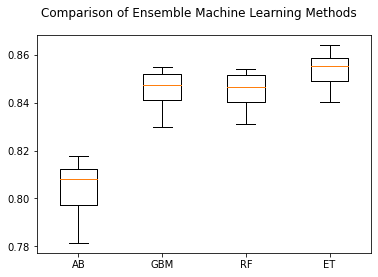

In [273]:
# Compare these ensemble methods graphically 
plt.close(); 
fig = plt.figure();
fig.suptitle('Comparison of Ensemble Machine Learning Methods'); 
ax = fig.add_subplot(111); 
plt.boxplot(results); 
ax.set_xticklabels(names);
plt.show();

Ahah! Three of these ensemble methods perform better than LR with parameter tuning. Extra Tree (ET) comes out as the best ensemble model, with an AUC of 0.853731. ET even shows some potential to reach above an AUC of 0.86. AdaBoost (AB) produces the worst performance among these ensemble methods. 

Interestingly, our previous SVM model remains in the lead position.

Therefore, **the top 2 machine learning models are:**  
- SVM is the best model so far, with rescaled features, a 'C' value of 0.3 and the RBF kernel. This yields an AUC of 0.863117;  
- ET is the 2nd best model, with an AUC of 0.853731.

## Part 3.5: Finalize models

At this point, the top 2 models are:  
- SVM, with rescaled features, a 'C' value of 0.3 and the RBF kernel; and  
- Extra Tree (ET). 

To ﬁnalize the model selection, I'll **train each of the two lucky candidates on the entire training dataset and make predictions for the hold-out validation dataset** to conﬁrm our ﬁndings from above. 

In [275]:
# import necessary libraries
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

#### Finalize SVM

In [277]:
# prepare the model
scaler = MinMaxScaler(feature_range=(0, 1)).fit(X_train)
rescaledX = scaler.transform(X_train)
model = SVC(C=0.3) # 'RBF' kernel is already the default option for SVM, so no need to specify this
model.fit(rescaledX, Y_train)
# estimate accuracy on validation dataset 
rescaledValidationX = scaler.transform(X_validation) 
predictions_SVC = model.predict(rescaledValidationX) 
#print accuracy score
print('Accuracy score for SVM: {}'.format(accuracy_score(Y_validation, predictions_SVC)))

Accuracy score for SVM: 0.855125


*Support Vector Machine (SVM) has achieved an overall accuracy of 85.51% on the validation dataset!*

Now, let's also re-estimate the Extra Tree (ET) ensemble model.

#### Finalize ET

In [279]:
# define the Extra Tree (ET) model
model = ExtraTreesClassifier()
# fit the model on the whole dataset
model.fit(X_train, Y_train)
# estimate accuracy on validation dataset
predictions_ET = model.predict(X_validation)
#printaccuracy score
print('Accuracy score for ET: {}'.format(accuracy_score(Y_validation, predictions_ET)))

Accuracy score for ET: 0.84525


*Extra Tree (ET) has achieved an overall accuracy of 84.53% on the validation dataset!*

Now it's time to call our cleaned testing dataset and generate model predictions for this exercise. Yay!!!

# Part 4: Submitting predictions

This is the very last stage of the exercise. My choice for the top 2 machine learning models are:  
- Support Vector Machine (SVM), with with rescaled features, a 'C' value of 0.3 and the RBF kernel;  
- Extra Tree (ET); an ensemble machine learning algorithm that combines the predictions from many decision trees.   

I'll use these top 2 machine learning models to generate predictions on the 'exercise_02_test.csv' dataset. The testing dataset is already loaded and cleaned in section 'Part 1.1' above. In the next steps, I will then:  

- apply feature engineering to the testing dataset (as done above at modeling stage)  
- generate predictions with each of the top 2 machine learning models that were trained in the 'Finalize Models' section  
- output my predictions to two separate .csv files for submission.

**Make predictions with the first best model (SVM) and save output to .csv file.**

Remember, our explanatory features that were selected with Lasso are stored in this list: '*sel_features_list*'.

In [304]:
# this should be a "10k x 11" DataFrame.
df_test[sel_features_list].shape

(10000, 11)

In [361]:
# rescale training features
scaler = MinMaxScaler(feature_range=(0, 1)).fit(X_train)
rescaledX = scaler.transform(X_train)

# rescale testing dataset
scaler = MinMaxScaler(feature_range=(0, 1)).fit(df_test[sel_features_list])
rescaled_df_test_sel = scaler.transform(df_test[sel_features_list])

# create the SVM model on full training sample
svm_model = SVC(probability=True, C=0.3)  # 'RBF' kernel is already the default option for SVM, so no need to specify this

# fit the model on the whole training dataset
svm_model.fit(rescaledX, Y_train)
#results = svm_model.predict_proba(rescaledX)

# Use testing dataset to predict the probabilities for belonging in 0 or 1 classes; prob(y=0) and prob(y=1)
## Ref. to documentation: https://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html#sklearn.calibration.CalibratedClassifierCV
svm_predicted_test = svm_model.predict_proba(rescaled_df_test_sel) # this is a NumPy array

# convert array to a Pandas DataFrame
predictions_SVM = pd.DataFrame(svm_predicted_test)
predictions_SVM  # Prints the DataFrame. You'll notice this is a Nx3 DataFrame with "N = number of observations", then 1 index column, 1 column for class '0' and 1 column for class '1'

,0,1
0,0.834701,0.165299
1,0.944920,0.055080
2,0.836188,0.163812
3,0.872862,0.127138
4,0.089440,0.910560
...,...,...
9995,0.932404,0.067596
9996,0.882310,0.117690
9997,0.677338,0.322662
9998,0.983578,0.016422


In [362]:
# export predictions to my working directory as a .csv file
## keep values only for Prob(y=1)
predictions_SVM[1].to_csv('results1.csv', index=False, header=False) # no header label or index column

In [363]:
# I want to display numerical values with 6 decimal places for more clarity (back to the default value that I suppressed earlier)
pd.set_option('precision', 6)

# summary statistics
predictions_SVM.describe()

,0,1
count,1.000000e+04,10000.000000
mean,7.928041e-01,0.207196
std,2.314414e-01,0.231441
min,2.885118e-07,0.005970
25%,7.656408e-01,0.065120
50%,8.876517e-01,0.112348
75%,9.348804e-01,0.234359
max,9.940300e-01,1.000000


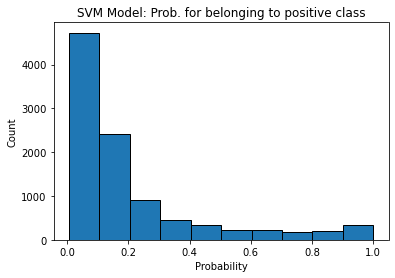

In [364]:
# plotting the distribution of Prob.(y=1) 
plt.hist(predictions_SVM[1], edgecolor = 'k'); 
plt.xlabel('Probability'); plt.ylabel('Count'); 
plt.title('SVM Model: Prob. for belonging to positive class');

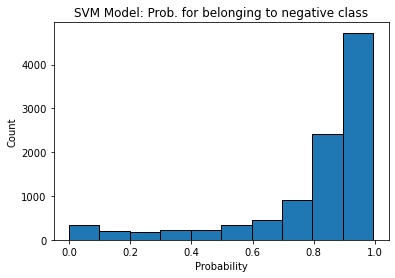

In [365]:
# plotting the distribution of Prob.(y=0) 
plt.hist(predictions_SVM[0], edgecolor = 'k'); 
plt.xlabel('Probability'); plt.ylabel('Count'); 
plt.title('SVM Model: Prob. for belonging to negative class');

**Make predictions with the second best model (ET) and save output to .csv file.**

In [356]:
# no need to rescale training features, because ET is a tree-based model
#scaler = MinMaxScaler(feature_range=(0, 1)).fit(X_train)
#rescaledX = scaler.transform(X_train)

# rescale testing dataset
scaler = MinMaxScaler(feature_range=(0, 1)).fit(df_test[sel_features_list])
rescaled_df_test_sel = scaler.transform(df_test[sel_features_list])

# create the Extra Tree (ET) model on full training sample
extra_tree = ExtraTreesClassifier()

# fit the model on the whole training dataset
extra_tree.fit(X_train, Y_train)

# Use testing dataset to predict the probabilities for belonging in 0 or 1 classes; prob(y=0) and prob(y=1)
## Ref. to documentation: https://scikit-learn.org/stable/modules/generated/sklearn.tree.ExtraTreeClassifier.html?highlight=extratreesclassifier
pred_test_ET = extra_tree.predict_proba(rescaled_df_test_sel) # this is a NumPy array

# convert array to a Pandas DataFrame
predictions_ET = pd.DataFrame(pred_test)
predictions_ET  # Prints the DataFrame. You'll notice this is a Nx3 DataFrame with "N = number of observations", then 1 index column, 1 column for class '0' and 1 column for class '1'

,0,1
0,0.834973,0.165027
1,0.945590,0.054410
2,0.836471,0.163529
3,0.873365,0.126635
4,0.086951,0.913049
...,...,...
9995,0.933055,0.066945
9996,0.882857,0.117143
9997,0.672459,0.327541
9998,0.983947,0.016053


In [357]:
# export predictions to my working directory as a .csv file
## keep values only for Prob(y=1)
predictions_ET[1].to_csv('results2.csv', index=False, header=False) # no header label or index column

In [358]:
# I want to display numerical values with 6 decimal places for more clarity (back to the default value that I suppressed earlier)
#pd.set_option('precision', 6)

# summary statistics
predictions_ET.describe()

,0,1
count,1.000000e+04,10000.000000
mean,7.926530e-01,0.207347
std,2.325289e-01,0.232529
min,2.462789e-07,0.005786
25%,7.653411e-01,0.064471
50%,8.882204e-01,0.111780
75%,9.355293e-01,0.234659
max,9.942136e-01,1.000000


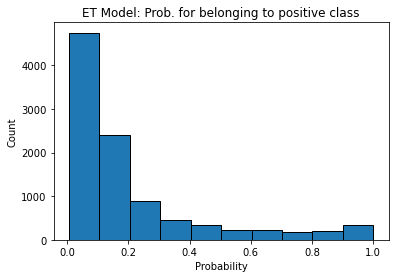

In [359]:
# plotting the distribution of Prob.(y=1) 
plt.hist(predictions_ET[1], edgecolor = 'k'); 
plt.xlabel('Probability'); plt.ylabel('Count'); 
plt.title('ET Model: Prob. for belonging to positive class');

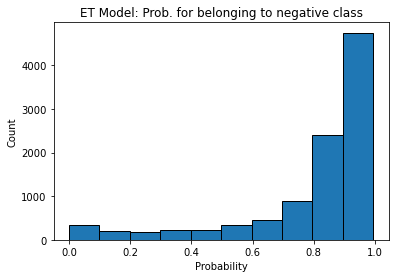

In [360]:
# plotting the distribution of Prob.(y=0) 
plt.hist(predictions_ET[0], edgecolor = 'k'); 
plt.xlabel('Probability'); plt.ylabel('Count'); 
plt.title('ET Model: Prob. for belonging to negative class');

----------------------------------------------------------

We're done. Yay!!!    

It appears that ET produces more reasonable predictions than SVM.

**This has been such a FUN exercise :) **
-------------------------------------------------------------